## Causal Inferance - The casual effect of financial literacy on finanacial wellbeing.


### Why investigate the causal effect of financial literacy on financial wellbeing?


In economic and financial theory, individuals are assumed to be well informed agents that act on economic variables that maximize their utility. In such constructs, knowledge can be said to have a direct impact on the decision making and outcomes of the individual. For instance, in economic theory, the Life-Cycle hypothesis describes individuals spending and saving habits over the course of a lifetime. The underlying assumption is that rational individuals are well informed and plan spending over their lifetimes, taking into account their future income (Hayes, 2025). In financial markets, individuals collect and process all accessible information in a decision making process to optimize their utility, well being, and profit. Additionally, individuals have the capacity to continuously revise their current situation based on new information to maximize their utility (Sajid, Mushtaq, Murtaza, Yahiaoui, & Pereira, 2024). It can be seen that the obtainment and utilization of relevant information directly have a effect in an individuals life-cycle and utilitarian outcome in financial markets. Interestingly, empirical evidence has shown that individuals do not practice rational decision making in various financial areas (Benartzi & Thaler, 2001). Although, research continues to support that financial knowledge does positively contribute to financial decision-making and financial well-being.

Many research papers that analyze factors that contribute to financial well-being are often descriptive and do not make casual inference (Sajid, Mushtaq, Murtaza, Yahiaoui, & Pereira, 2024). They often employ OLS regression to obtain coefficient estimates that describe the impact a unit increase in a particular feature (e.g., financial literary, financial confidence) causes on financial-wellbeing. In my analysis, I intend to move past descriptive analysis by utilizing a casual machine learning framework known as double machine learning which treats observational data as if it were a randomized control trial. By assigning observations to treatment groups within covariate profiles, I will attempt to understand the average treatment affect that financial literacy has on the financial well-being.



In [145]:
import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
# alt.data_transformers.enable("vegafusion")
# !pip install "vegafusion[embed]>=1.5.0"
# !pip install "vl-convert-python>=1.6.0"

In [146]:
# # Connecting drive
# from google.colab import drive
# drive.mount('/content/drive')

In [147]:
# # Loading data

# # specifying path
# loc = r'/content/drive/MyDrive/Casual Inferance/NFCS 2024 State Data 250623.xlsx'

# # Reading data
# data = pd.read_excel(loc)

# # Reviewing datashape
# data.shape

In [148]:
# Creating copy
df = data.copy()

In [149]:
# Retaining features based on literature review
covariates = ['STATEQ', 'A50A', 'A3Ar_w', 'Ethnicity', 'A5_2015', 'A6','A11', 'A9', 'A41', 'A61', 'J5', 'J62', 'A8_2021','A4A_new_w', 'J32', 'EA_1','G20','M20', 'B1','J10']
financial_wellbeing = ['J41_1', 'J41_2', 'J41_3', 'J42_1', 'J42_2' ]
financial_lit_questions = ['M10', 'M7', 'M6']
weights = ['wgt_s3']

# Obtaining all columns
all_cols = list(df.columns)

# Performing list comprehension
cols_retained = [x for x in all_cols if x in covariates or x in financial_wellbeing or x in financial_lit_questions or x in weights]

# Retaining columns
df = df[cols_retained]

The National Financial Capabilities Survey has over 100 questions spanning many different categories, creating a comprehensive financial profile of each respondent. The questionnaire provides basic demographic information about each respondent, insights into respondents' financial behaviors, information on attitudes towards financial institutions, insights into a respondent’s level of financial literacy, and much more. Being a survey, virtually all of the features are of an ordinal or nominal nature. In particular, this survey contains a high quantity of nominal attributes, making dimension reduction techniques like PCA inappropriate for analysis. Instead, this project takes a guided approach to variable selection using literature to define financial wellbeing, financial literacy, and factors that influence the outcome of financial well-being.

Financial literacy is defined utilizing the “big three” financial literacy questions. This definition was developed by Lusardi and Mitchell and measures knowledge of interest rates, inflation, and risk diversification. Respondents who answer all three questions are considered to be financially literate, and 0 otherwise. There are three fundamental concepts that the literacy definition attempts to capture: (i) numeracy and capacity to do calculations related to interest rates, such as compound interest; (ii) understanding of inflation; and (iii) understanding of risk diversification (Placeholder1). These concepts underpin the saving and consumption lifecycle, where individuals seek financial knowledge during times of wealth accumulation to optimize their saving and consumption patterns. Those who are financially literate can shape their optimal saving and investment patterns more effectively by understanding current market conditions (high interest rates), social safety net benefits, and other external features to make better-informed decisions about their current state and how to maximize their marginal utility over their lifetime.


The indicator feature is composed of the following questions:

-	Suppose you had \$100 in a savings account and the interest rate was 2% per year. After 5 years, how much do you think you would have in the account if you left the money to grow:
    - [more than \$102, exactly \$102, less than \$102? Do not know, refuse to answer., Correct: more than \$102]

-	Imagine that the interest rate on your savings account was 1% per year and inflation was 2% per year. After 1 year, would you be able to buy:
    - [more than, exactly the same as, less than today with the money in this account? Correct: ]

-	Do you think that the following statement is true or false? ‘Buying a single company stock usually provides a safer return than a stock mutual fund.’
    -	False [Do not know; refuse to answer.]


Financial well-being is defined as “a state where a person can fully meet current and ongoing financial obligations, feels secure about their financial future, and has the freedom to make choices that enhance their quality of life” (CFPB, 2015, p. 18). There is no consensus among experts on how this is defined,  although rigorous research efforts by the Consumer Financial Protection Bureau have been made to create a consumer-driven definition of financial well-being. The original scale includes 10 tested questions that allow practitioners and researchers to accurately and consistently quantify or observe an individual's well-being (Placeholder2). The NFCS employs an abbreviated version of this set of 10 questions, which will be utilized in this analysis.

The scale includes the following questions:
- (1) “Because of my money situation, I feel like I will never have the things"
- (2) “I am just getting by financially”
- (3) “I am concerned that the money I have or will save won’t last”
- (4) “I have money left over at the end of the month”
- (5) “My finances control my life.”

Casual inference assumes that all factors that influence the outcome of interest (financial well-being) are included to partial out their effect on the outcome and treatment. In this model, we include demographic information about participants, including their age, gender, marital status, education level, household income, employment status, and ethnicity (a binary variable of whether the participant is White Non-Hispanic). Additional controls were included inside the study to align with existing literature, including whether a household experienced an unexpected shock in income in the last 12 months, if a participant has any unpaid or resolved medical bills, home ownership, has a bank account, and if an individual received financial education in an educational institution or in the workplace where they were employed (Placeholder3). The participants' credit record was also included in the study for its perceived effect of influencing major financial outcomes (e.g., getting a loan) and thus overall financial well-being.




In [150]:
# Reviewing retained columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25539 entries, 0 to 25538
Data columns (total 28 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   STATEQ     25539 non-null  object 
 1   A50A       25539 non-null  object 
 2   A3Ar_w     25539 non-null  object 
 3   A4A_new_w  25539 non-null  object 
 4   A5_2015    25539 non-null  object 
 5   A6         25539 non-null  object 
 6   A11        25539 non-null  object 
 7   A8_2021    25539 non-null  object 
 8   A9         25539 non-null  object 
 9   A41        25539 non-null  object 
 10  A61        25539 non-null  object 
 11  J5         25539 non-null  object 
 12  J10        25539 non-null  object 
 13  J62        25539 non-null  object 
 14  J32        25539 non-null  object 
 15  J41_1      25539 non-null  object 
 16  J41_2      25539 non-null  object 
 17  J41_3      25539 non-null  object 
 18  J42_1      25539 non-null  object 
 19  J42_2      25539 non-null  object 
 20  B1    

Missing data check

In [151]:
# Obtaining missing data
df.isna().sum()


,0
STATEQ,0
A50A,0
A3Ar_w,0
A4A_new_w,0
A5_2015,0
A6,0
A11,0
A8_2021,0
A9,0
A41,0


No missing values denoted by np.nan. We do have within some of the questionnaire responses values such as "Prefer not to say" and "Don't know". This will be handled later on in the project. In particular, when appropriate, one could attempt to infer the most likely response to a question (e.g., For the question “What is highest education attained by those who raised you”, we can impute “Bachelors Degree” for an individual who has a doctorate and is in the 90th percentile in the income distribution). One concern is that doing this infringes on the respondents right to privacy. In this project, when appropriate, we will perform list-wise deletion to remove these values or directly encode them as a nominal variable.

Renaming Columns

In [152]:
# Renaming columns for clearity
map = {'A50A':'Gender', 'A3Ar_w':'Age_group', 'A5_2015':'Edu_attain', 'A41': 'Edu_attain_raised', 'A6': 'Marital_status','A11': 'Children_Dependent', 'A9':'Employment_status', 'A61':'Adult_dependent', 'J5':'Emergency_funds_3_month', 'J62':'Severe_weather_events', 'A8_2021':'Annual_income', 'wgt_s3': 'State-level-weight (Age, Eth, Edu)', 'A4A_new_w':'Ethnic','J32':'Credit_record','EA_1':'Owning_home','G20':'Health_shock','M20':'Financial_edu_school','B1':'Checking_account', 'J10':'Income_shock'}

['J41_1', 'J41_2 ', 'J41_3', 'J42_1', 'J42_2' ]
financial_wellbeing = {'J41_1':'FW_Never_have_the_things_I_want', 'J41_2':'FW_I_am_just_getting_by', 'J41_3':'FW_Money_I_have_or_will_save_wont_last', 'J42_1':'FW_Money_left_over', 'J42_2':'FW_finances_control_my_life'}
# Financial literacy questions based on the Lusardi and Mitchell scale
financial_lit_questions = {'M10':'FinLit_return', 'M7':'FinLit_inflation', 'M6':'FinLit_interest'}
# Renameing columns
df.rename(columns=map,inplace= True)
df.rename(columns=financial_wellbeing,inplace= True)
df.rename(columns=financial_lit_questions,inplace= True)


# Feature engineering

## Encoding Financial Wellbeing Features

In [153]:
# Printing before financial wellness transformations
financial_wellbeing = ['FW_Never_have_the_things_I_want', 'FW_I_am_just_getting_by','FW_Money_I_have_or_will_save_wont_last','FW_Money_left_over','FW_finances_control_my_life']
# Printing before transformation
for x in financial_wellbeing:
  print(f"""
  Before Transformation
  -----
  Feature: {x}
  Value_Counts:
  {df[x].value_counts()}
  """,
)


  Before Transformation
  -----
  Feature: FW_Never_have_the_things_I_want
  Value_Counts:
  FW_Never_have_the_things_I_want
Describes me somewhat          5852
Does not describe me at all    5435
Describes me very little       4936
Describes me completely        4877
Describes me very well         3841
Don't know                      471
Prefer not to say               127
Name: count, dtype: int64
  

  Before Transformation
  -----
  Feature: FW_I_am_just_getting_by
  Value_Counts:
  FW_I_am_just_getting_by
Describes me somewhat          6095
Does not describe me at all    5103
Describes me completely        5007
Describes me very well         4708
Describes me very little       4184
Don't know                      321
Prefer not to say               121
Name: count, dtype: int64
  

  Before Transformation
  -----
  Feature: FW_Money_I_have_or_will_save_wont_last
  Value_Counts:
  FW_Money_I_have_or_will_save_wont_last
Describes me completely        6496
Describes me somewhat     

Reviewing "Don't know" and "Prefer not to say" responses of the financial wellbeing columns

In [154]:
# Define the financial wellbeing columns
financial_wellbeing_cols = [
    'FW_Never_have_the_things_I_want',
    'FW_I_am_just_getting_by',
    'FW_Money_I_have_or_will_save_wont_last',
    'FW_Money_left_over',
    'FW_finances_control_my_life'
]

# Define the values to consider as 'missing' (Don't know or Prefer not to say)
missing_values = ["Don't know", "Prefer not to say"]

# Create a mask where any of the financial wellbeing columns contain a missing value
mask = df[financial_wellbeing_cols].isin(missing_values).any(axis=1)

# Applying mask
df_filt = df[mask]

# Calculating list-wise deletion impact
impact = len(df_filt) / len(df) * 100

# Displaying impact
print(f'The impact from list-wise deletion is a {impact:.2f}% ({len(df_filt)} observations) reduction on observations')

The impact from list-wise deletion is a 5.32% (1359 observations) reduction on observations


The impact of retaining only respondents that answered all questions is a 5.32% reduction in overall sample size. While this is a meaningful amount, it is necessary for creating a composite financial wellbeing feature. List-wise deletion will be performed to address this.

Filtering table

In [155]:
# Removing rows that have "Don't know" or "Prefer not to say" as reponses
df = df[~mask]

Mapping financial well-being responses

In [156]:
# Mapping Financial Wellbeing responses
FW_map_1 = {'Does not describe me at all':5, 'Describes me very little':4, 'Describes me somewhat':3, 'Describes me very well':2, 'Describes me completely':1} # For negative responses
FW_map_2 = {'Never':1, 'Rarely':2, 'Sometimes':3, 'Often':4, 'Always':5}
FW_map_3 = {'Never':5, 'Rarely':4, 'Sometimes':3, 'Often':2, 'Always':1}
df['FW_Never_have_the_things_I_want'] = df['FW_Never_have_the_things_I_want'].map(FW_map_1)
df['FW_I_am_just_getting_by'] = df['FW_I_am_just_getting_by'].map(FW_map_1)
df['FW_Money_I_have_or_will_save_wont_last'] = df['FW_Money_I_have_or_will_save_wont_last'].map(FW_map_1)
df['FW_Money_left_over'] = df['FW_Money_left_over'].map(FW_map_2)
df['FW_finances_control_my_life'] = df['FW_finances_control_my_life'].map(FW_map_3)

# Printing after transformation
for x in financial_wellbeing:
  print(f"""
  After Transformation
  -----
  Feature: {x}
  Value_Counts:
  {df[x].value_counts()}
  """,
)


  After Transformation
  -----
  Feature: FW_Never_have_the_things_I_want
  Value_Counts:
  FW_Never_have_the_things_I_want
3    5664
5    5265
4    4803
1    4726
2    3722
Name: count, dtype: int64
  

  After Transformation
  -----
  Feature: FW_I_am_just_getting_by
  Value_Counts:
  FW_I_am_just_getting_by
3    5849
5    4951
1    4825
2    4529
4    4026
Name: count, dtype: int64
  

  After Transformation
  -----
  Feature: FW_Money_I_have_or_will_save_wont_last
  Value_Counts:
  FW_Money_I_have_or_will_save_wont_last
1    6275
3    6142
2    4972
4    3678
5    3113
Name: count, dtype: int64
  

  After Transformation
  -----
  Feature: FW_Money_left_over
  Value_Counts:
  FW_Money_left_over
3    6514
2    5364
5    4803
4    3972
1    3527
Name: count, dtype: int64
  

  After Transformation
  -----
  Feature: FW_finances_control_my_life
  Value_Counts:
  FW_finances_control_my_life
3    7256
4    4958
2    4626
1    4265
5    3075
Name: count, dtype: int64
  


## Encoding Financial Literacy Features

In [157]:
# Creating Financial literacy feature list
financial_lit_questions = ['FinLit_return','FinLit_interest','FinLit_inflation']

# Printing before transformation
for x in financial_lit_questions:
  print(f"""
  Before Transformation
  -----
  Feature: {x}
  Value_Counts:
  {df[x].value_counts()}
  """,
)


  Before Transformation
  -----
  Feature: FinLit_return
  Value_Counts:
  FinLit_return
Don't know           11084
False                10683
True                  2313
Prefer not to say      100
Name: count, dtype: int64
  

  Before Transformation
  -----
  Feature: FinLit_interest
  Value_Counts:
  FinLit_interest
More than $102       17507
Don't know            3475
Exactly $102          1882
Less than $102        1208
Prefer not to say      108
Name: count, dtype: int64
  

  Before Transformation
  -----
  Feature: FinLit_inflation
  Value_Counts:
  FinLit_inflation
Less than today      15016
Don't know            4885
Exactly the same      2250
More than today       1909
Prefer not to say      120
Name: count, dtype: int64
  


We find again that the "Prefer not to say" responses are included in these nominal features. One could argue that someone who selects "prefers not to say" may truly know the answer, but chooses not to respond. This could be simply because they did not want to attempt to answer the question or due to other reasons such as a time constraint when answering questions. In either case, this would then be equivalent to a missing value. I will look at the impact of dropping the "prefered not to say" values.

In [158]:
# Creating mask
mask = (df['FinLit_return'] == 'Prefer not to say') | (df['FinLit_interest'] == 'Prefer not to say') | (df['FinLit_inflation'] == 'Prefer not to say')

# Applying mask
data_filtered = df[mask]

# Displaying data
data_filtered.head()

,STATEQ,Gender,Age_group,Ethnic,Edu_attain,Marital_status,Children_Dependent,Annual_income,Employment_status,Edu_attain_raised,...,FW_Money_left_over,FW_finances_control_my_life,Checking_account,Owning_home,Health_shock,Financial_edu_school,FinLit_interest,FinLit_inflation,FinLit_return,"State-level-weight (Age, Eth, Edu)"
39,Arizona,Female,65+,Non-White,Associate's degree,Single,Do not have any children,"At least $35,000 but less than $50,000",Retired,Associate's degree,...,3,3,Yes,No,Yes,No,Exactly $102,Less than today,Prefer not to say,1.021208
45,New Jersey,Male,55-64,White non-Hispanic,Bachelor's degree,Single,Do not have any children,"At least $200,000 but less than $300,000",Work full-time for an employer [or the military],Bachelor's degree,...,3,3,Yes,Yes,No,Don't know,Don't know,Prefer not to say,Don't know,0.781793
285,Florida,Female,45-54,Non-White,High school graduate - GED or alternative cred...,Married,3,"At least $25,000 but less than $35,000",Homemaker,High school graduate/GED,...,5,1,Yes,No,No,No,Prefer not to say,Prefer not to say,False,1.052012
381,Georgia,Male,35-44,Non-White,Associate's degree,Single,Do not have any children,"At least $50,000 but less than $75,000",Work part-time for an employer [or the military],Associate's degree,...,2,1,Yes,Yes,Yes,No,Prefer not to say,Prefer not to say,Don't know,0.886610
385,California,Female,65+,White non-Hispanic,Bachelor's degree,Married,No financially dependent children,"At least $150,000 but less than $200,000",Retired,High school graduate/GED,...,4,3,Yes,Yes,No,No,Prefer not to say,Prefer not to say,Prefer not to say,0.883381


In [159]:
# Calcuating the impact of list-wise deletion
impact = (len(data_filtered)/ len(df)) *100

# Displaying impact
print(f'The total impact of dropping any rows that contain "prefer not to say" is {impact:.2f}%')

The total impact of dropping any rows that contain "prefer not to say" is 0.91%


In [160]:
# Dropping rows
df = df[~mask]

Total impact from dropping rows is minimum and is necessary to create a treatment group for casual analysis.

Mapping categorical reponses - 1 denotes a correct answer to a financial literacy question

In [161]:
# Mapping interest literacy question - 1 denotes respondent answered question correctly
fin_lit_interest ={
"More than $102":1,
"Don't know":0,
"Exactly $102":0,
"Less than $102":0,
"Prefer not to say":0,
}
df['FinLit_interest'] = df['FinLit_interest'].map(fin_lit_interest)

# Mapping inflation literacy question
fin_lit_inflation = {
"Less than today":1,
"Don't know":0,
"Exactly the same":0,
"More than today":0,
"Prefer not to say":0
}
df['FinLit_inflation'] = df['FinLit_inflation'].map(fin_lit_inflation)

# Mapping safe return financial literacy question
fin_lit_return = {
"Don't know":0,
"False":1,
"True":0,
"Prefer not to say":0
}
df['FinLit_return'] = df['FinLit_return'].map(fin_lit_return)


In [162]:
# Printing after transformation
for x in financial_lit_questions:
  print(f"""
  After Transformation
  -----
  Feature: {x}
  Value_Counts:
  {df[x].value_counts()}
  """,
)


  After Transformation
  -----
  Feature: FinLit_return
  Value_Counts:
  FinLit_return
0    13313
1    10647
Name: count, dtype: int64
  

  After Transformation
  -----
  Feature: FinLit_interest
  Value_Counts:
  FinLit_interest
1    17452
0     6508
Name: count, dtype: int64
  

  After Transformation
  -----
  Feature: FinLit_inflation
  Value_Counts:
  FinLit_inflation
1    14974
0     8986
Name: count, dtype: int64
  


## Creating Composite Financial Wellbeing Feature and Creating a Binary Financial Literacy Attribute

In [163]:
# Feature Engineering
financial_wellbeing = ['FW_Never_have_the_things_I_want', 'FW_I_am_just_getting_by','FW_Money_I_have_or_will_save_wont_last','FW_Money_left_over','FW_finances_control_my_life']
financial_lit_questions_lusardi = ['FinLit_return','FinLit_interest','FinLit_interest']
financial_lit_questions = ['FinLit_return','FinLit_interest','FinLit_inflation','Morgage_interest_payments_overtime','Compound_interest_how_long_to_double', 'interest_rates_and_bond_relationship']

# Creating an average response metric to financial well-being
df['financial_wellbeing_composite'] = df[financial_wellbeing].sum(axis=1, numeric_only=True)/len(financial_wellbeing)

# Creating a function
def literate(row):
  if row['FinLit_return'] == 1 and row['FinLit_interest'] == 1 and row['FinLit_inflation'] == 1:
    return 1
  else:
    return 0

# Applying the function row-wise
df['literate'] = df.apply(literate, axis=1)


In [164]:
# Reviewing engineered feature
df[financial_wellbeing].head()

,FW_Never_have_the_things_I_want,FW_I_am_just_getting_by,FW_Money_I_have_or_will_save_wont_last,FW_Money_left_over,FW_finances_control_my_life
0,4,4,3,4,4
1,5,5,5,4,5
2,5,5,5,4,5
3,2,2,1,1,3
4,4,3,3,4,3


In [165]:
df.literate.value_counts()

,count
literate,
0,16259
1,7701


# Exploratory analysis
## State adjusted weights are applied where applicable to have accurate visualizations of state-level demographic representations

In [166]:
# Reviewing columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23960 entries, 0 to 25538
Data columns (total 30 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   STATEQ                                  23960 non-null  object 
 1   Gender                                  23960 non-null  object 
 2   Age_group                               23960 non-null  object 
 3   Ethnic                                  23960 non-null  object 
 4   Edu_attain                              23960 non-null  object 
 5   Marital_status                          23960 non-null  object 
 6   Children_Dependent                      23960 non-null  object 
 7   Annual_income                           23960 non-null  object 
 8   Employment_status                       23960 non-null  object 
 9   Edu_attain_raised                       23960 non-null  object 
 10  Adult_dependent                         23960 non-null  object 

In [167]:
# Reviewing data
df.head()

,STATEQ,Gender,Age_group,Ethnic,Edu_attain,Marital_status,Children_Dependent,Annual_income,Employment_status,Edu_attain_raised,...,Checking_account,Owning_home,Health_shock,Financial_edu_school,FinLit_interest,FinLit_inflation,FinLit_return,"State-level-weight (Age, Eth, Edu)",financial_wellbeing_composite,literate
0,Ohio,Female,35-44,White non-Hispanic,Bachelor's degree,Married,2,"At least $150,000 but less than $200,000",Work full-time for an employer [or the military],Associate's degree,...,Yes,Yes,No,"Yes, and I did participate in the financial ed...",1,1,1,0.859644,3.8,1
1,Washington,Male,65+,White non-Hispanic,Associate's degree,Widowed/widower,No financially dependent children,"At least $50,000 but less than $75,000",Retired,Associate's degree,...,Yes,Yes,No,"Yes, but I did not participate in the financia...",1,1,1,0.975078,4.8,1
2,Oregon,Male,65+,White non-Hispanic,"Some college, no degree",Married,No financially dependent children,"At least $100,000 but less than $150,000",Retired,"Some college, no degree",...,Yes,Yes,No,"Yes, and I did participate in the financial ed...",1,1,1,0.893974,4.8,1
3,Washington,Female,65+,White non-Hispanic,Post graduate degree,Married,No financially dependent children,"At least $50,000 but less than $75,000",Self-employed,Post graduate degree,...,Yes,Yes,No,No,1,1,1,0.778748,1.8,1
4,Texas,Female,65+,Non-White,Post graduate degree,Divorced,No financially dependent children,"At least $35,000 but less than $50,000",Retired,Post graduate degree,...,Yes,No,Yes,No,1,1,0,0.783507,3.4,0


In [168]:
# Creating custom order

# Define the custom order for 'Edu_attain' and 'Annual_income'
education_order = [
    "Did not complete high school",
    "High school graduate - GED or alternative credential",
    "High school graduate - regular high school diploma",
    "Some college, no degree",
    "Associate's degree",
    "Bachelor's degree",
    "Post graduate degree"
]

income_order = [
    "Less than $15,000",
    "At least $15,000 but less than $25,000",
    "At least $25,000 but less than $35,000",
    "At least $35,000 but less than $50,000",
    "At least $50,000 but less than $75,000",
    "At least $75,000 but less than $100,000",
    "At least $100,000 but less than $150,000",
    "At least $150,000 but less than $200,000",
    "At least $200,000 but less than $300,000",
    "$300,000 or more"
]

# Creating histograms of continuous features
chart_age = alt.Chart(df, title='Distribution of Respondent Age').mark_bar().encode(
    x=alt.X('Age_group', type='nominal'),
    y=alt.Y('sum(State-level-weight (Age, Eth, Edu)):Q') # Adjust by the state level weights
).properties(width=500, height=400)

chart_edu = alt.Chart(df, title= "Distribution of Respondent's Educational Attainment").mark_bar().encode(
    x=alt.X('Edu_attain', type='nominal', sort= education_order),
    y=alt.Y('sum(State-level-weight (Age, Eth, Edu)):Q'),
).properties(width=500, height=400)

chart_child_dependent = alt.Chart(df, title = 'Number of Dependents a Respondent Has').mark_bar().encode(
    x=alt.X('Children_Dependent', type='nominal'),
    y=alt.Y('sum(State-level-weight (Age, Eth, Edu)):Q') # Adjust by the state level weights
).properties(width=500, height=400)

chart_income = alt.Chart(df, title = 'Survey Self Reported Income Distribution').mark_bar().encode(
    x=alt.X('Annual_income', type='nominal', sort=income_order ),
    y=alt.Y('sum(State-level-weight (Age, Eth, Edu)):Q') # Adjust by the state level weights
).properties(width=500, height=400)

chart_gender = alt.Chart(df, title = 'Gender Distribution').mark_bar().encode(
    x=alt.X('Gender', type='nominal', sort=income_order ),
    y=alt.Y('sum(State-level-weight (Age, Eth, Edu)):Q') # Adjust by the state level weights
).properties(width=500, height=400)

chart_employment = alt.Chart(df, title = 'Employment Distribution').mark_bar().encode(
    x=alt.X('Employment_status', type='nominal', sort='y' ),
    y=alt.Y('sum(State-level-weight (Age, Eth, Edu)):Q') # Adjust by the state level weights
).properties(width=500, height=400)

# Plotting charts
alt.vconcat(alt.hconcat(chart_age, chart_edu, chart_gender), alt.hconcat(chart_child_dependent,chart_income, chart_employment))

alt.VConcatChart(...)

Reviewing the visualization above reveals that we are working with a diverse set of individuals. Participants consist of a fairly balanced age representation from 25-64 years of age. We find that those aged 18-24 have lower representation compared to all age groups, with 65+ individuals having significant representation in the survey. We have fair representation of individuals who have a bachelor's degree, some college, no degree, and high school graduates. Overall, a meaningful number of the demographic seems to have at least some college education. Gender distribution is balanced, and the employment status of most individuals is full-time or retired.  The centrality of the income distribution appears to be around 50,000 to less than 100,000. Most respondents do not have dependents.  

Comparison of Financially literate and non-literate individuals

In [169]:
# Encoding the literate feature for visualization
plot_df = df.copy()

# Mapping literate
literacy = {1:'Financially Literate', 0:"Not Financially Literate"}
plot_df['literate'] = plot_df['literate'].map(literacy)

# Checking the distribution of financially literate individuals
bar = alt.Chart(plot_df, title= alt.Title(text ="Most respondents are not Financially Literate", subtitle="Proportion of Financially Literate vs. Not Financially Literate")).mark_bar(width=1).encode(
    x=alt.X('literate', title='Financial Literacy'),
    y=alt.Y('sum(State-level-weight (Age, Eth, Edu)):Q', title='Weighted Count'), # Adjust by the state level weights
    color='literate'
).properties(width=300, height=400)

dot = alt.Chart(plot_df, title= alt.Title(text ="Most respondents are not Financially Literate", subtitle="Proportion of Financially Literate vs. Not Financially Literate")).mark_circle(width=1000).encode(
    x=alt.X('literate', title='Financial Literacy'),
    y=alt.Y('sum(State-level-weight (Age, Eth, Edu)):Q', title='Weighted Count'), # Adjust by the state level weights
    color='literate'
).properties(width=300, height=400)

chart_1 = dot+bar

chart_1



alt.LayerChart(...)

About 1/3 of respondents are financially literate. This corroborates the findings of the S&P Ratings Services Global Financial Literacy Survey that globally, about 2/3 of individuals are not financially literate. It does deviate from their finding that 57% of adults in the US are financially literate. The reason for this difference is twofold: the survey was conducted in 2018, whereas the NCFS survey was conducted in 2024, and the GFLS uses a different measure of financial literacy. This illustrates the need for the standardization of financial literacy so that accurate comparisons can be performed. The Lusardi and Mitchell financial literacy measure has been widely adopted and has been found to be correlated with many different financial literacy definitions. Its wide adoption is the main reason for its use in this study.

Comparison of treatment groups (i.e. Financial literacy) - Faceted by Educational Attainment

In [170]:
# Creating ordered list
income_order = [
    "Less than $15,000",
    "At least $15,000 but less than $25,000",
    "At least $25,000 but less than $35,000",
    "At least $35,000 but less than $50,000",
    "At least $50,000 but less than $75,000",
    "At least $75,000 but less than $100,000",
    "At least $100,000 but less than $150,000",
    "At least $150,000 but less than $200,000",
    "At least $200,000 but less than $300,000",
    "$300,000 or more"
]

# Creating ordered categories
plot_df['Annual_income'] = pd.Categorical(
    plot_df['Annual_income'],
    categories=income_order,
    ordered=True
)

/tmp/ipython-input-1666827501.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


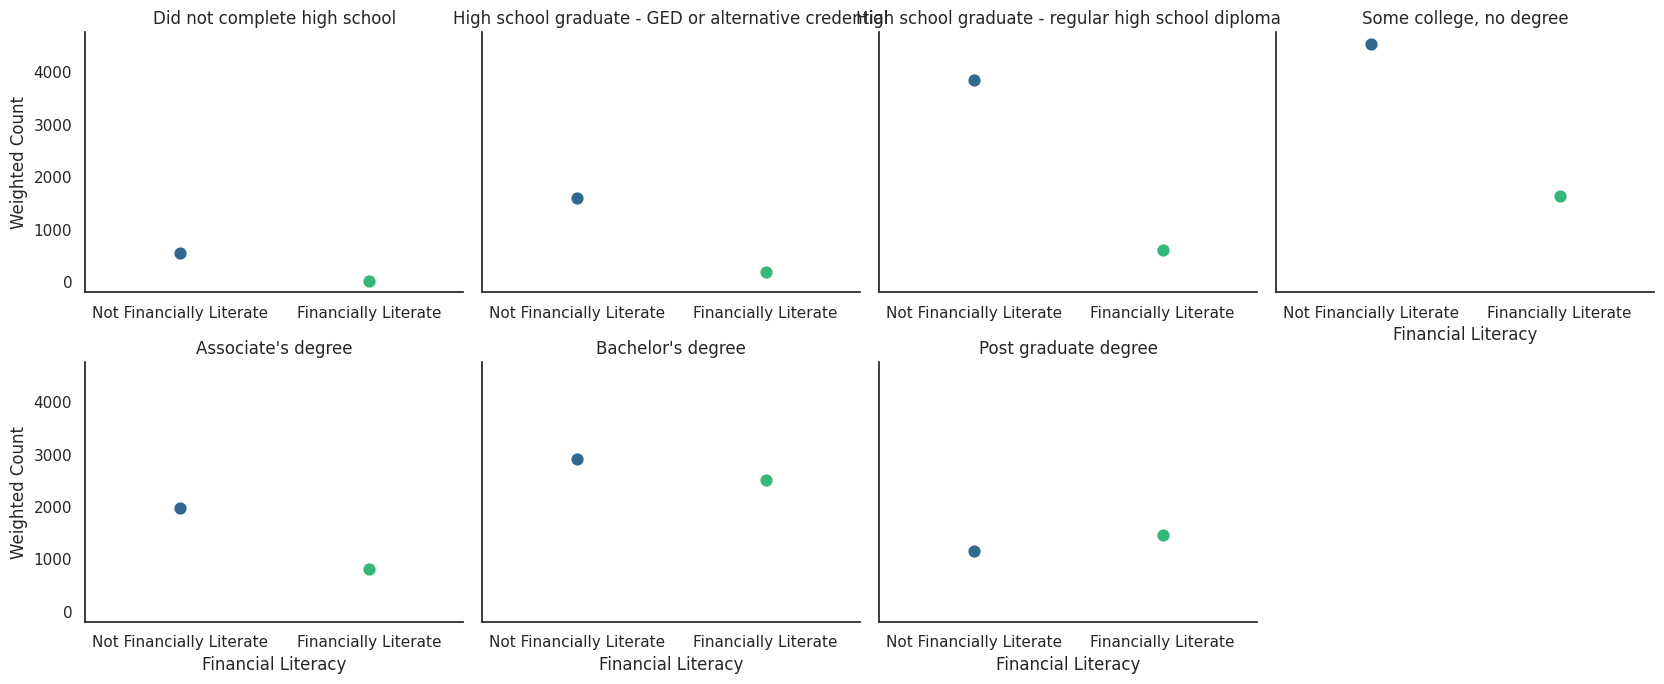

In [171]:
# Using sns.catplot to create a faceted bar chart
g = sns.catplot(
    data=plot_df,
    kind="point",
    x="literate",
    y="State-level-weight (Age, Eth, Edu)",
    col="Edu_attain",
    col_order= education_order,
    order = ['Not Financially Literate', 'Financially Literate'],
    estimator=sum,
    errorbar=None,
    col_wrap=4, # Reduced columns per row to give each plot more space
    height=3.5,   # Taller plots
    aspect=1.2, # Wider plots (Stretches the graph)
    sharex=False, # <--- Forces x-labels to appear on every plot
    palette="viridis"
)

# Adjust labels and titles
g.set_axis_labels("Financial Literacy", "Weighted Count")
g.set_titles("{col_name}")

plt.show()

Note: Plot counts are all weighted to give each observation fair representation of state-level demographics.

Some interesting patterns are revealed in this visualization. Reviewing the subsets of observations with a high school diploma or less we find that the ratio of not “Financially Literate” to “Not Financially Literate” is relatively small, although “Did not complete high school” participants have a relatively small sample size to have confidence in its results. From then on, we find increasing educational attainment is associated with a higher ratio of Financially Literate” to “Not Financially Literate” until a full inversion effect is seen with post-graduates. We are likely to see a positive correlation between educational attainment with financial literacy.

The behavior does seem reasonable and rational. As individuals gain higher educational attainment, they are likely to have taken coursework in economics, business, and other practical material that is useful for making personal financial decisions that better ones current state. Additionally, even if an individual has not taken these courses, they still will have pragmatic skills to conduct research into these topics and likely be in close contact with other individuals who practice high-quality financial decision-making, which can assist them in learning these skills.

Comparison of treatment groups (i.e. Financial literacy) individuals - Faceted by Annual income

/tmp/ipython-input-3076945678.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


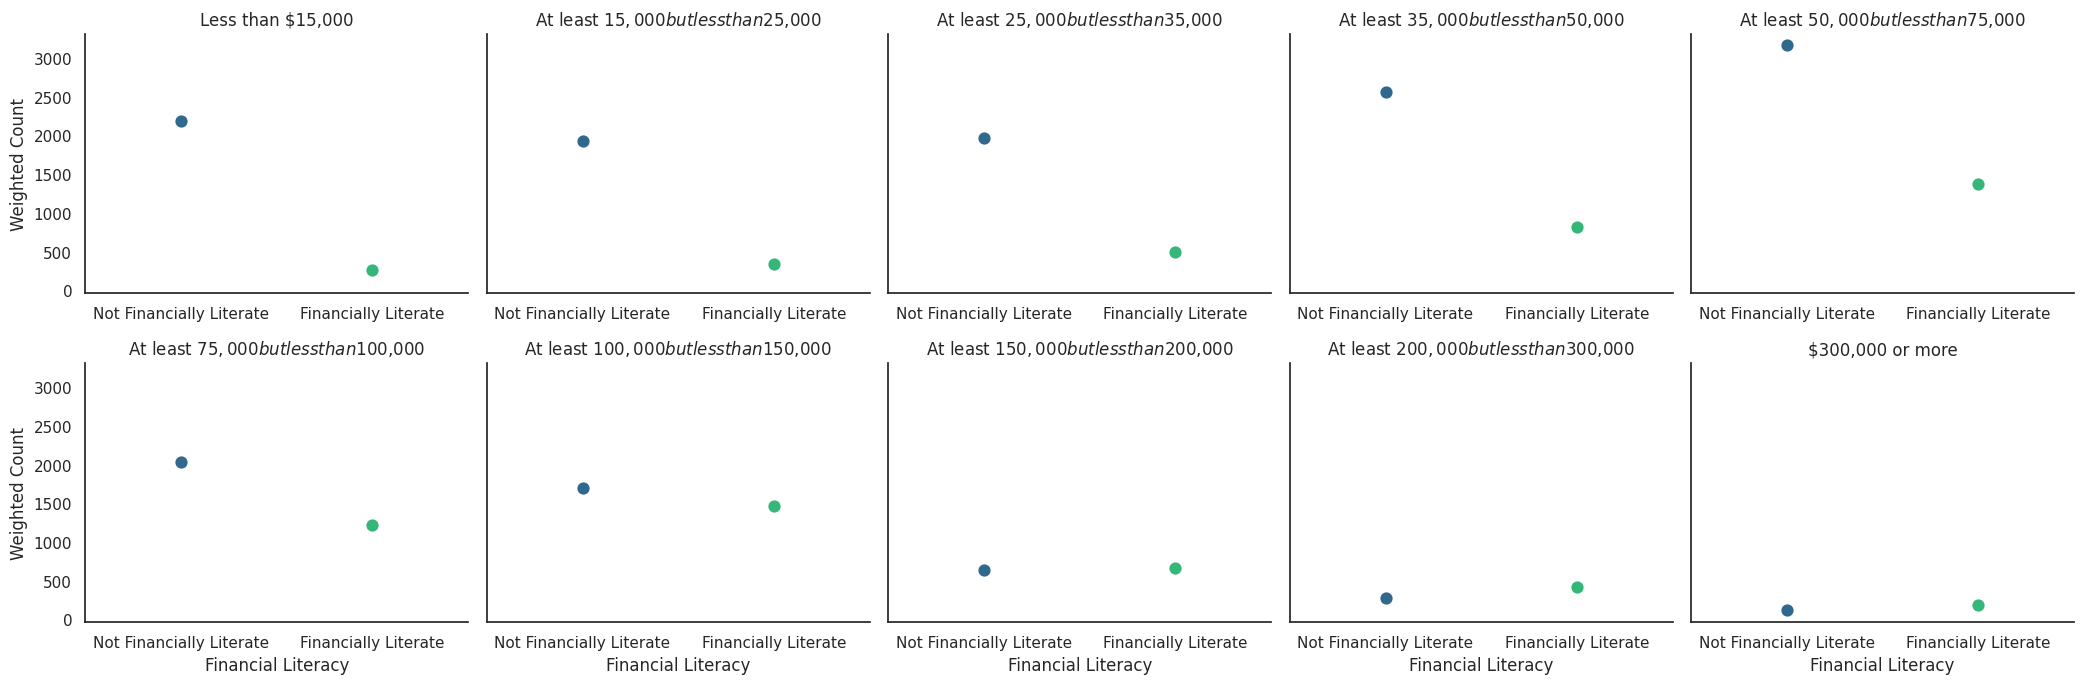

In [172]:
# Using sns.catplot to create a faceted bar chart
g = sns.catplot(
    data=plot_df,
    kind="point",
    x="literate",
    y="State-level-weight (Age, Eth, Edu)",
    col="Annual_income",
    order=['Not Financially Literate', 'Financially Literate'],
    estimator=sum,
    errorbar=None,
    col_wrap=5, # number of columns in faceted plot
    height=3.5,   # Taller plots
    aspect=1.2, # Wider plots (Stretches the graph)
    sharex=False, # <--- Forces x-labels to appear on every plot
    palette="viridis"
)

# Adjust labels and titles
g.set_axis_labels("Financial Literacy", "Weighted Count")
g.set_titles("{col_name}")

plt.show()

Overall, we find that as individuals increase their annual income, the ratio of the “Financially Literate” to “Not Financially Literate” counts starts to increase. This suggests that there is a positive correlation between financial literacy and annual income. The behavior does seem appropriate for several reasons. Generally, those who are more affluent tend to be more educated individuals. As such, the high educational attainment will, on average, equip these individuals at the very least the skills and ability to conduct and gather information effectively to make better financial decisions. Affluent individuals are likely to have the means to hire individuals to manage their assets (e.g., Certified Financial Advisors/Planners). The connection with these asset managers likely requires them to understand some minimum threshold of financial information in order to understand how their assets are being managed and their expected return on investment.

Comparison of treatment groups (i.e. Financial literacy) individuals - Faceted by Gender

/tmp/ipython-input-3452353736.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


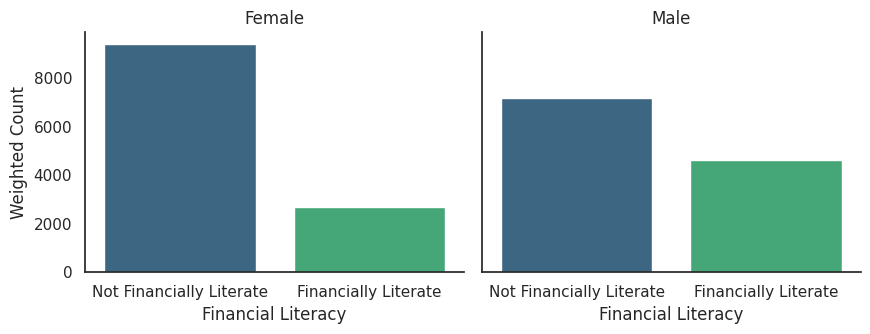

In [173]:
# Using sns.catplot to create a faceted bar chart
g = sns.catplot(
    data=plot_df,
    kind="bar",
    x="literate",
    y="State-level-weight (Age, Eth, Edu)",
    col="Gender",
    estimator=sum,
    errorbar=None,
    order = ['Not Financially Literate', 'Financially Literate'],
    col_wrap=4, # Reduced columns per row to give each plot more space
    height=3.5,   # Taller plots
    aspect=1.2, # Wider plots (Stretches the graph)
    sharex=False, # <--- Forces x-labels to appear on every plot
    palette="viridis"
)

# Adjust labels and titles
g.set_axis_labels("Financial Literacy", "Weighted Count")
g.set_titles("{col_name}")

plt.show()

Faceting the treatment by gender, we see an interesting pattern. A higher proportion of males is financially literate than the proportion of financially literate women. This finding is consistent with financial literacy research found in the GFLS and a RAND American Life Panel regarding the gender gap in financial literacy. One study on the RAND American Life panel found that controlling for sociodemographic characteristics had a limited effect on the gap. Study found that for men, there is a positive correlation between decision-making and financial literacy, and not for women (Fonseca, Mullen, Zamarro, & Zissimopoulos, 2012). A theory is that of specialization in the household. Men specialize in making household financial decisions, thereby necessitating the need to acquire financial knowledge, while women focus on other household tasks like caring for the children.

Financial Well-Being Distribution

In [174]:
# Checking the distribution of financially literate individuals
alt.Chart(plot_df, title= alt.Title(text ="Participants Self Report Moderate Financial Wellbeing on Average")).mark_bar().encode(
    x=alt.X('financial_wellbeing_composite:Q', title='Financial Wellbeing', bin=True),
    y=alt.Y('sum(State-level-weight (Age, Eth, Edu)):Q', title='Weighted Count')
).properties(width=500, height=400)

alt.Chart(...)

Reviewing the financial well-being plot, we find some sort of central tendency towards the region 2.0 – 3.5 on the financial well-being composite score. The frequency of those participants who score higher or lower than this central tendency range is fairly uniform. It will be interesting to dive into a subset of sociodemographic groups to reveal any material differences in financial well-being levels.

Financial Well-Being Distribution - Faceted by Gender

/tmp/ipython-input-2300658715.py:2: UserWarning: The `weights` parameter has no effect with kind='violin'.
  sns.catplot(


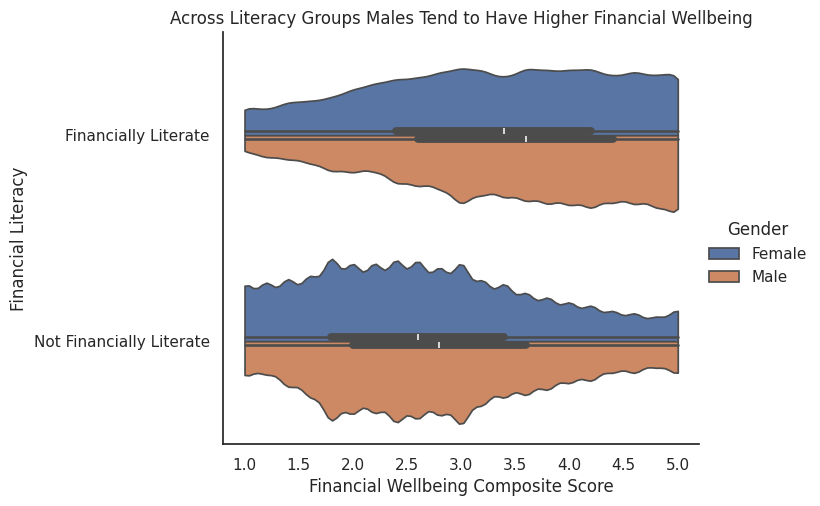

In [175]:
# Creating a violin plot (Note: The plot is not fully representative of state level distributions)
sns.catplot(
    data=plot_df, x="financial_wellbeing_composite", y='literate', hue="Gender",
    kind="violin", bw_adjust=.5, cut=0, split=True, weights= 'State-level-weight (Age, Eth, Edu)', aspect=1.5
)

# Creating a title
plt.title('Across Literacy Groups Males Tend to Have Higher Financial Wellbeing')
plt.xlabel("Financial Wellbeing Composite Score")
plt.ylabel("Financial Literacy")
plt.show()

In [176]:
# Checking the distribution of financially literate individuals
alt.Chart(plot_df, title= alt.Title(text ="Women Tend To Have Lower Self-Reported Financial Well-Being Than Males")).mark_bar().encode(
    x=alt.X('financial_wellbeing_composite:Q', title='Financial Wellbeing', bin=True),
    y=alt.Y('sum(State-level-weight (Age, Eth, Edu)):Q', title='Weighted Count'),
    column=alt.Column('Gender:N'),
    color='Gender'
).properties(width=500, height=400)

alt.Chart(...)

Faceting financial well-being by gender, we see that females have a right skew, with most respondents reporting lower financial well-being than that of males. This makes intuitive sense, considering males have a higher proportion of individuals who are financially literate. This increased knowledge equips them with the information needed to make better savings and investment decisions to improve their current state of financial well-being.

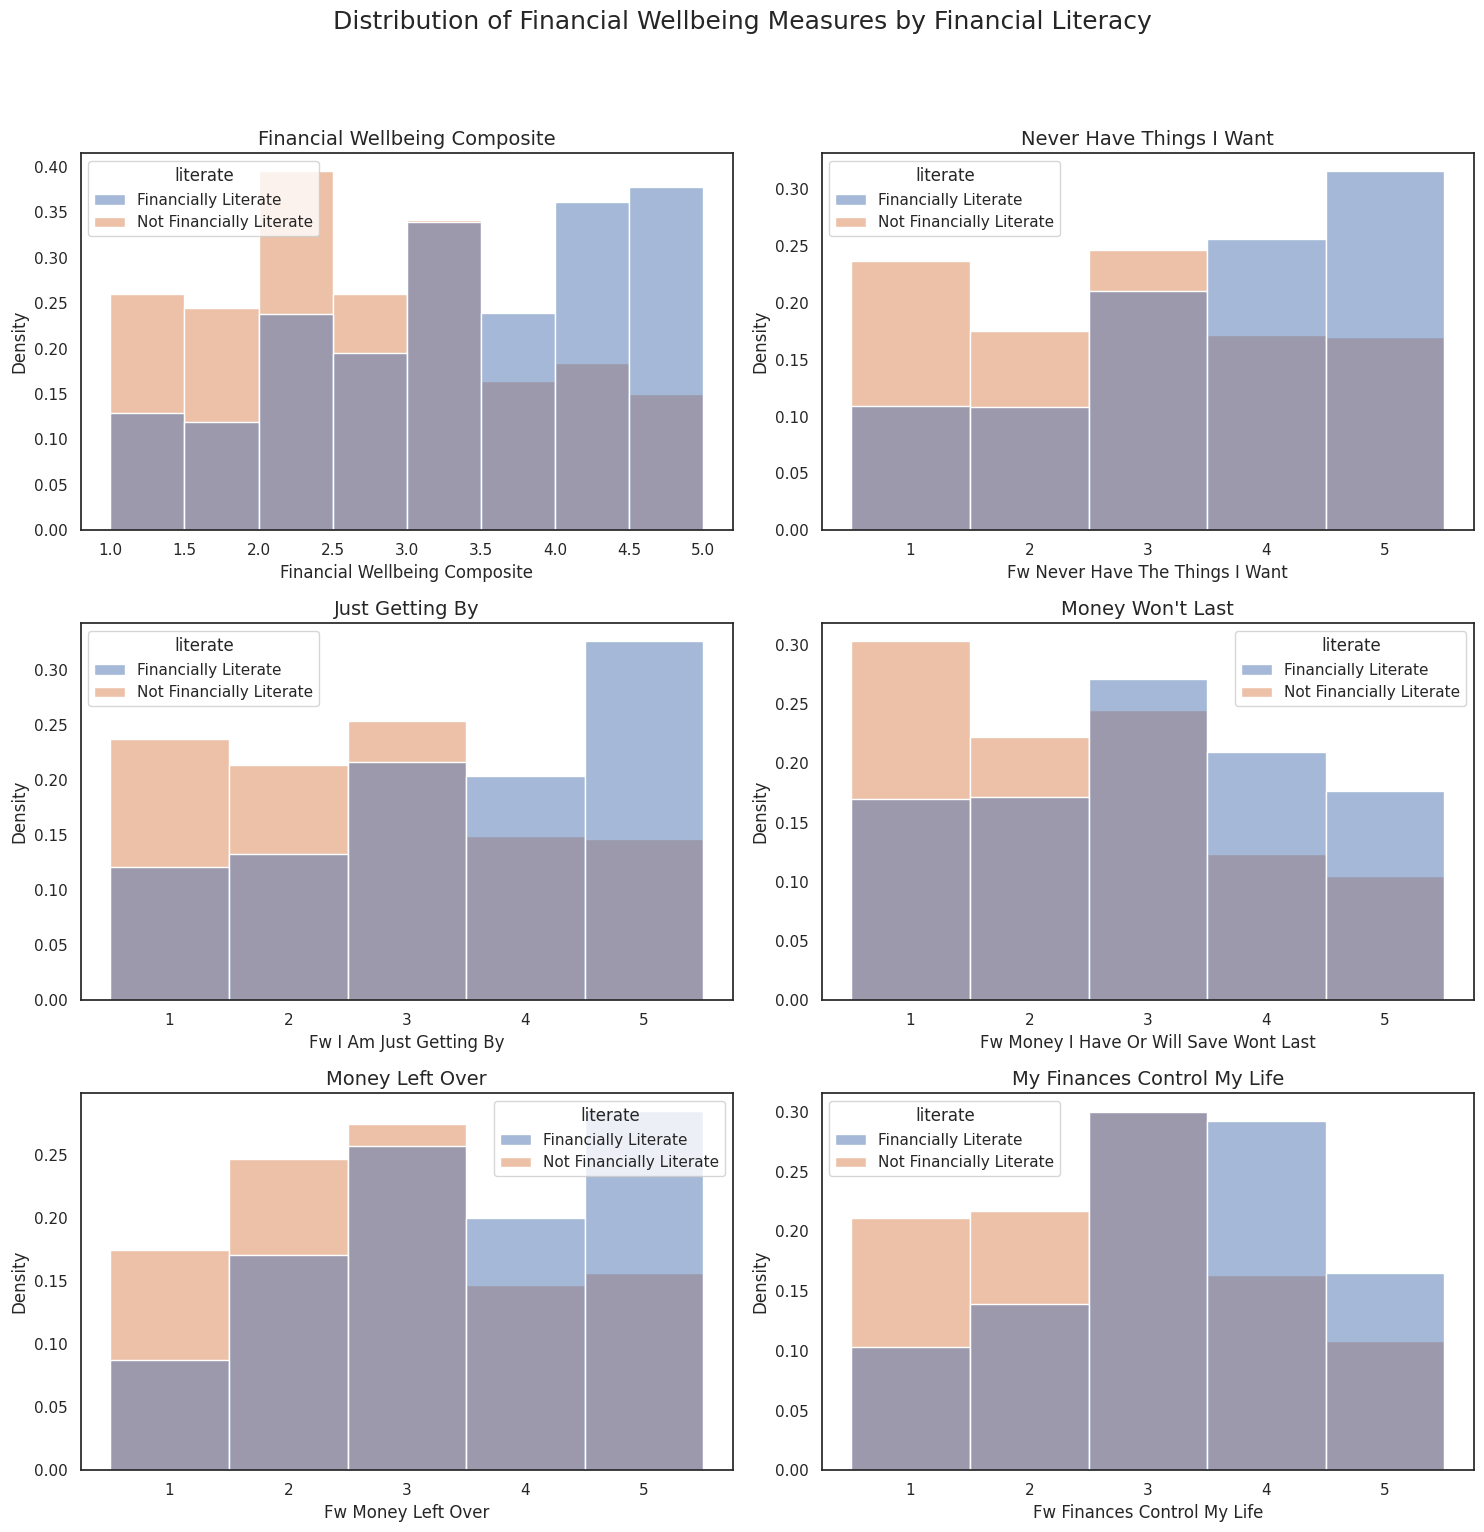

In [177]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to plot and their corresponding bin counts
# Adjusted bins for integer-based features to center around integers
plot_configs = [
    {"col": "financial_wellbeing_composite", "bins": np.arange(1, 5.5, 0.5), "title": "Financial Wellbeing Composite"},
    {"col": "FW_Never_have_the_things_I_want", "bins": np.arange(0.5, 6.5, 1), "title": "Never Have Things I Want", "ticks": [1,2,3,4,5]},
    {"col": "FW_I_am_just_getting_by", "bins": np.arange(0.5, 6.5, 1), "title": "Just Getting By", "ticks": [1,2,3,4,5]},
    {"col": "FW_Money_I_have_or_will_save_wont_last", "bins": np.arange(0.5, 6.5, 1), "title": "Money Won't Last", "ticks": [1,2,3,4,5]},
    {"col": "FW_Money_left_over", "bins": np.arange(0.5, 6.5, 1), "title": "Money Left Over", "ticks": [1,2,3,4,5]},
    {"col": "FW_finances_control_my_life", "bins": np.arange(0.5, 6.5, 1), "title": "My Finances Control My Life", "ticks": [1,2,3,4,5]}
]

# Create a figure with a 3x2 grid of subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

fig.suptitle('Distribution of Financial Wellbeing Measures by Financial Literacy', fontsize=18, y=1.02)

for i, config in enumerate(plot_configs):
    sns.histplot(
        data=plot_df,
        x=config["col"],
        hue="literate",
        stat="density",
        common_norm=False, # Normalizes counts within each hue category
        bins=config["bins"], # Use explicitly defined bins
        ax=axes[i]
    )
    axes[i].set_title(config["title"], fontsize=14)
    axes[i].set_xlabel(config["col"].replace('_', ' ').title(), fontsize=12) # Auto-format x-label
    axes[i].set_ylabel("Density", fontsize=12)

    # Set ticks for better alignment, especially for integer categories
    if "ticks" in config:
        axes[i].set_xticks(config["ticks"])
    elif config["col"] == "financial_wellbeing_composite":
        # For composite score, set ticks at bin centers for clarity
        # Or, simpler, set ticks at 0.5 intervals if bins are 0.5 wide
        axes[i].set_xticks(np.arange(1, 5.1, 0.5))

# Hide any unused subplots
for j in range(len(plot_configs), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjust layout to prevent suptitle overlap
plt.show()

This is a very insightful visualization revealing detailed information regarding the apectual makeup of the financial well-being score. To control for the imbalance of the treatment group, and density plot was chosen to better represent the data. Reviewing the financial well-being composite metric, the density plot illustrates that financially literate individuals seem to follow a left-skewed distribution in that there is an increasing concentration of responses in higher levels of financial well-being. Contrarily, non-financially literate individuals follow a right skew in that an increasing concentration of individuals have lower financial well-being scores. Reviewing the individual aspects of financial well-being corroborates with the aggregate financial well-being metric. For instance, the question “Because of my money situation, I never have the things I want”  individuals who are financially literate have a higher concentration of responses “Does not describe me at all” or a 5 in the x-axis. Across all financial well-being metrics, we find that those who are of high financial knowledge generally report a higher concentration of financial security and command control over their financial situation.

In [178]:
# Ensure 'Edu_attain' is categorical with a specific order
education_order = [
    "Did not complete high school",
    "High school graduate - GED or alternative credential",
    "High school graduate - regular high school diploma",
    "Some college, no degree",
    "Associate's degree",
    "Bachelor's degree",
    "Post graduate degree"
]
plot_df['Edu_attain'] = pd.Categorical(
    plot_df['Edu_attain'],
    categories=education_order,
    ordered=True
)

# Adjusting labels for better readablity
rename_1 = {'High school graduate - regular high school diploma':'High school graduate - regular', 'High school graduate - GED or alternative credential':'High school graduate - alt'}

plot_df['Edu_attain'] = plot_df['Edu_attain'].cat.rename_categories(rename_1)


In [179]:
plot_df['Edu_attain'].unique()

['Bachelor's degree', 'Associate's degree', 'Some college, no degree', 'Post graduate degree', 'High school graduate - regular', 'High school graduate - alt', 'Did not complete high school']
Categories (7, object): ['Did not complete high school' < 'High school graduate - alt' <
                         'High school graduate - regular' < 'Some college, no degree' < 'Associate's degree' <
                         'Bachelor's degree' < 'Post graduate degree']

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid

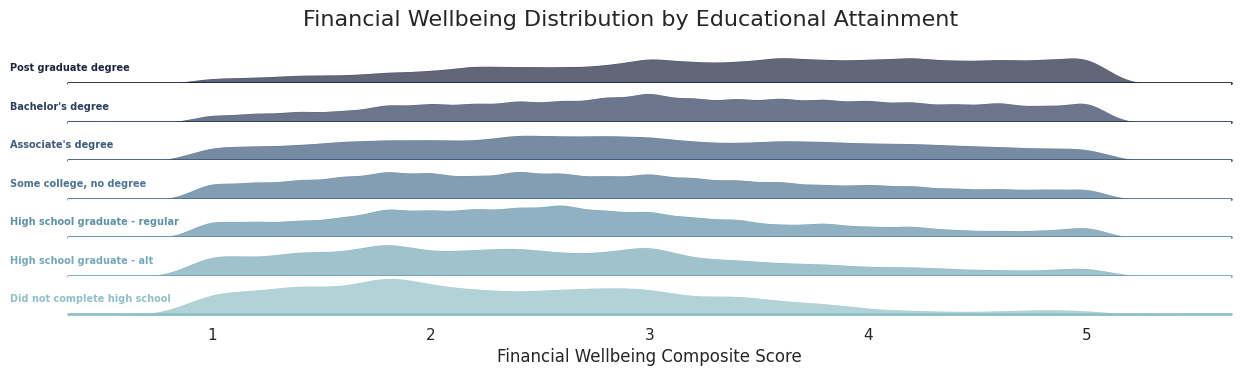

In [180]:
sns.set_theme(style="white")

education_order = [
    "Did not complete high school",
    "High school graduate - alt",
    "High school graduate - regular",
    "Some college, no degree",
    "Associate's degree",
    "Bachelor's degree",
    "Post graduate degree"
]
# Build temporary DataFrame
temp_data = pd.DataFrame({
    'x_val': plot_df['financial_wellbeing_composite'],
    'category': plot_df['Edu_attain'],
    'weights': plot_df['State-level-weight (Age, Eth, Edu)']
}).sort_values('category')

# FacetGrid setup
pal = sns.cubehelix_palette(len(education_order), rot=-.25, light=.7)
g = sns.FacetGrid(
    temp_data, row="category", hue="category",
    aspect=30, height=.5, palette=pal,
    row_order=education_order[::-1]  # reverse order for layering
)

# KDE plots
g.map_dataframe(
    sns.kdeplot, "x_val",
    weights="weights", bw_adjust=.5,
    clip_on=False, fill=True, alpha=0.7, linewidth=1.5
)
g.map_dataframe(
    sns.kdeplot, "x_val",
    weights="weights", clip_on=False,
    color="w", lw=2, bw_adjust=.5
)

# Baseline
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

# Label function using data directly
def label_edu(data, color, **kwargs):
    category = data['category'].iloc[0]
    ax = plt.gca()
    ax.text(-0.05, .4, category, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes, fontsize=7)

g.map_dataframe(label_edu)

# Overlap adjustment
g.figure.subplots_adjust(hspace=-.0)

# Cleanup
g.set_titles("")
g.set(yticks=[], ylabel="", xlabel="Financial Wellbeing Composite Score")
g.despine(bottom=True, left=True)
g.add_legend = False

# Overall title
plt.suptitle("Financial Wellbeing Distribution by Educational Attainment", y=0.98, fontsize=16)
plt.show()

/tmp/ipython-input-862387597.py:5: UserWarning: The `weights` parameter has no effect with kind='violin'.
  sns.catplot(


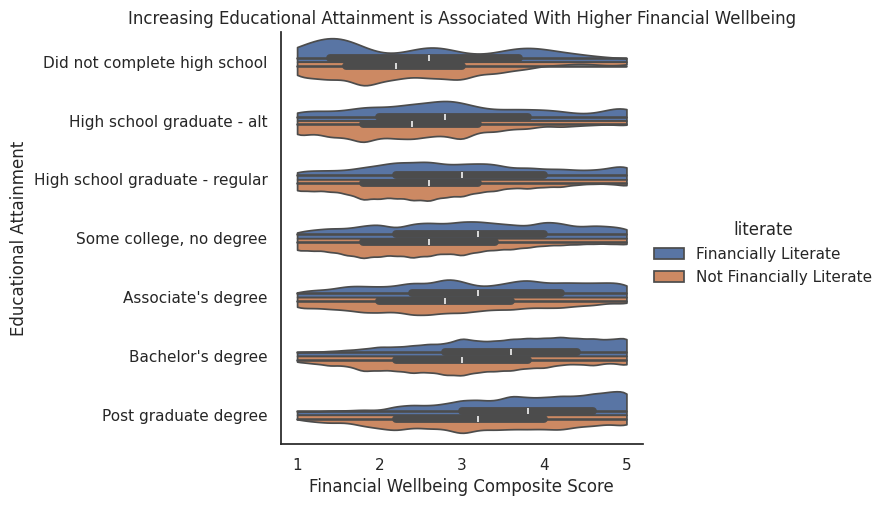

In [181]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creating violin plot
sns.catplot(
    data=plot_df, x="financial_wellbeing_composite", y='Edu_attain', hue="literate",
    kind="violin", bw_adjust=.5, cut=0, split=True, weights= 'State-level-weight (Age, Eth, Edu)', aspect=1.5)
# Displaying plot
plt.title('Increasing Educational Attainment is Associated With Higher Financial Wellbeing')
plt.xlabel("Financial Wellbeing Composite Score")
plt.ylabel("Educational Attainment")
plt.show()

The ridge plot above suggests that, in aggregate, as an individual achieves higher educational attainment, their overall financial well-being increases as well. For instance, comparing those individuals who have at least attained a high-school diploma to those who have earned a bachelor's degree, the concentration of responses reporting a 4-5 is starkly different. Disaggregating the results and focusing on the treatment groups, we find that for both groups, increasing educational attainment virtually always increases the median financial well-being scores. An interesting observation is that consistently across educational attainment levels, those who are financially literate score high on financial well-being scores. Furthermore, 50% of all financial well-being scores are always found at higher financial well-being scores than their non-financially literate counterparts.  

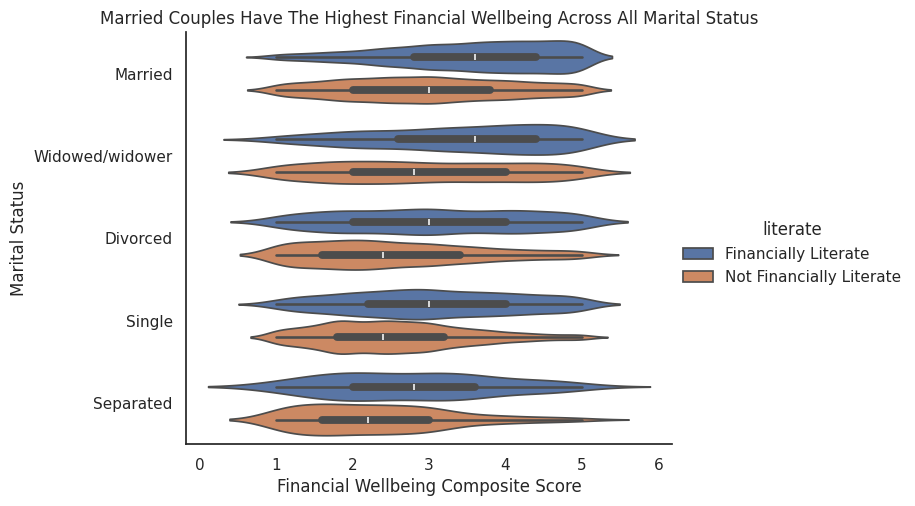

In [182]:
# Plotting marital status financial well being
sns.catplot(data=plot_df, x="financial_wellbeing_composite", y="Marital_status", kind="violin", hue='literate', aspect=1.5)
plt.title('Married Couples Have The Highest Financial Wellbeing Across All Marital Status')
plt.xlabel("Financial Wellbeing Composite Score")
plt.ylabel("Marital Status")
plt.show()

Across all marital statuses, we continue to see the trend that those who have high financial knowledge continue to report higher median financial well-being. The data suggests that couples who are married are generally associated with higher levels of financial well-being.

/tmp/ipython-input-213639278.py:6: UserWarning: The `weights` parameter has no effect with kind='box'.
  sns.catplot(data=plot_df, x="financial_wellbeing_composite", y="Children_Dependent", kind='box', order=order_depend, aspect=1.5, weights='State-level-weight (Age, Eth, Edu)')


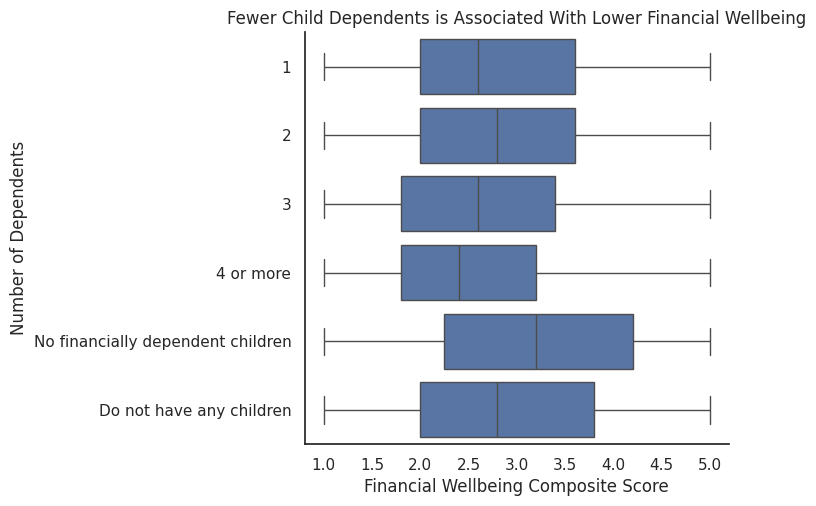

In [183]:
# Creating order
order_depend = ['1', '2','3', '4 or more', 'No financially dependent children','Do not have any children',]
# Transforming feature
df['Children_Dependent'] = pd.Categorical(df['Children_Dependent'], categories=order_depend, ordered=True)
# Plotting Box Plot
sns.catplot(data=plot_df, x="financial_wellbeing_composite", y="Children_Dependent", kind='box', order=order_depend, aspect=1.5, weights='State-level-weight (Age, Eth, Edu)')
# Displaying plot
plt.title('Fewer Child Dependents is Associated With Lower Financial Wellbeing')
plt.xlabel("Financial Wellbeing Composite Score")
plt.ylabel("Number of Dependents")
plt.show()

/tmp/ipython-input-3024727704.py:6: UserWarning: The `weights` parameter has no effect with kind='violin'.
  sns.catplot(data=plot_df, x="financial_wellbeing_composite", y="Credit_record", kind='violin', order=credit_order, aspect=1.5, weights='State-level-weight (Age, Eth, Edu)')


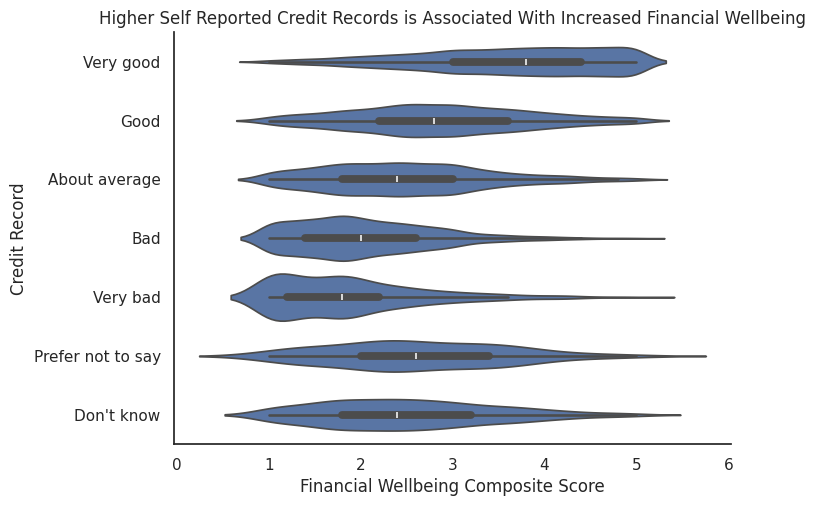

In [184]:
# Ensure 'Credit_record' is categorical with a specific order
credit_order = ['Very good', 'Good', 'About average', 'Bad', 'Very bad',
       'Prefer not to say', "Don't know"]

# Plotting Box Plot
sns.catplot(data=plot_df, x="financial_wellbeing_composite", y="Credit_record", kind='violin', order=credit_order, aspect=1.5, weights='State-level-weight (Age, Eth, Edu)')
# Displaying plot
plt.title('Higher Self Reported Credit Records is Associated With Increased Financial Wellbeing')
plt.xlabel("Financial Wellbeing Composite Score")
plt.ylabel("Credit Record")
plt.show()

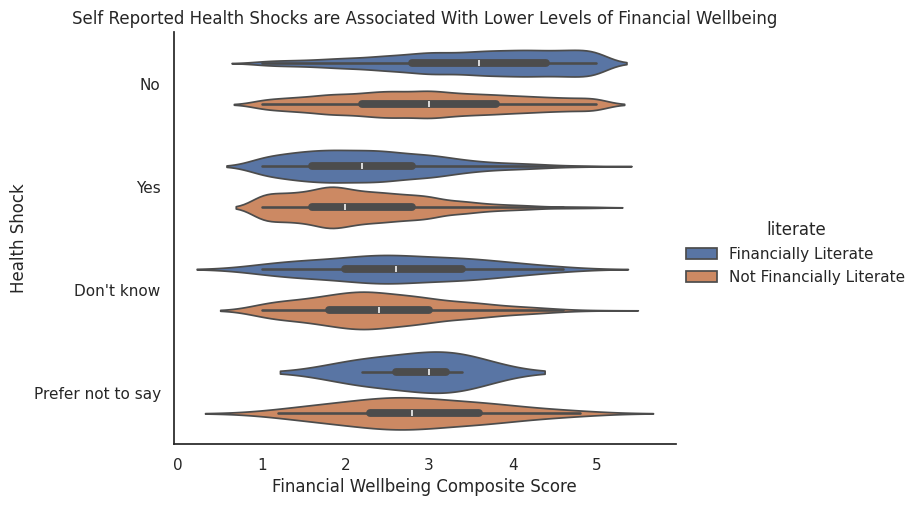

In [185]:
# Plotting marital status financial well being
sns.catplot(data=plot_df, x="financial_wellbeing_composite", y="Health_shock", kind="violin", hue='literate', aspect=1.5)
plt.title('Self Reported Health Shocks are Associated With Lower Levels of Financial Wellbeing')
plt.xlabel("Financial Wellbeing Composite Score")
plt.ylabel("Health Shock")
plt.show()

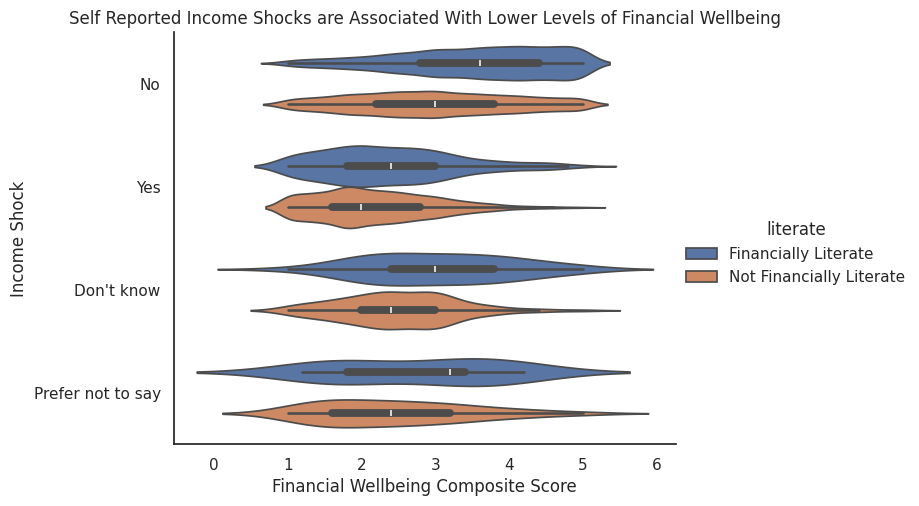

In [186]:
# Plotting marital status financial well being
sns.catplot(data=plot_df, x="financial_wellbeing_composite", y="Income_shock", kind="violin", hue='literate', aspect=1.5)
plt.title('Self Reported Income Shocks are Associated With Lower Levels of Financial Wellbeing')
plt.xlabel("Financial Wellbeing Composite Score")
plt.ylabel("Income Shock")
plt.show()

Overall, continuing to analyze respondents by different characteristics, we consistently find that individuals who command higher levels of financial well-being are those who possess high financial knowledge. This relationship is even found to exist within those who experience external shocks like health and income shocks. This suggests that in unstable predicaments or environments knowledge of financial concepts will aid in making individuals feel more secure and in control of their current financial situation. It will be interesting to conduct a baseline general linear model to see the strength of association between financial literacy and financial well-being, and if it is a significant predictor of financial well-being.

Performing tabular exploratory analysis

In [187]:
# Creating a weighted average function
def my_agg(x):
    weighted_sum = (x['State-level-weight (Age, Eth, Edu)'] * x['financial_wellbeing_composite']).sum()
    sum_of_weights = x['State-level-weight (Age, Eth, Edu)'].sum()
    weighted_ave = weighted_sum / sum_of_weights if sum_of_weights != 0 else 0
    names = {'weighted_ave_price': weighted_ave}
    return pd.Series(names, index=['weighted_ave_price'])

# Applying groupby
plot_df.groupby(['literate','Gender','Annual_income']).apply(my_agg)

# Adapted from the source below
# Source - https://stackoverflow.com/a
# Posted by Avidadollars, modified by community. See post 'Timeline' for change history
# Retrieved 2025-11-30, License - CC BY-SA 4.0

/tmp/ipython-input-1949283906.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plot_df.groupby(['literate','Gender','Annual_income']).apply(my_agg)
/tmp/ipython-input-1949283906.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  plot_df.groupby(['literate','Gender','Annual_income']).apply(my_agg)


weighted_ave_price
literate                 Gender Annual_income                                               
Financially Literate     Female Less than $15,000                                   2.213648
                                At least $15,000 but less than $25,000              2.522475
                                At least $25,000 but less than $35,000              2.591999
                                At least $35,000 but less than $50,000              2.887990
                                At least $50,000 but less than $75,000              3.141962
                                At least $75,000 but less than $100,000             3.395239
                                At least $100,000 but less than $150,000            3.525477
                                At least $150,000 but less than $200,000            3.767669
                                At least $200,000 but less than $300,000            4.062445
                                $300,000 or more                                    3.883383
                         Male   Less than $15,000                                   2.594986
                                At least $15,000 but less than $25,000              2.608342
                                At least $25,000 but less than $35,000              2.757746
                                At least $35,000 but less than $50,000              2.916916
                                At least $50,000 but less than $75,000              3.192091
                                At least $75,000 but less than $100,000             3.491608
                                At least $100,000 but less than $150,000            3.650093
                                At least $150,000 but less than $200,000            3.774671
                                At least $200,000 but less than $300,000            3.993701
                                $300,000 or more                                    4.267160
Not Financially Literate Female Less than $15,000                                   2.255099
                                At least $15,000 but less than $25,000              2.358667
                                At least $25,000 but less than $35,000              2.401615
                                At least $35,000 but less than $50,000              2.589994
                                At least $50,000 but less than $75,000              2.762159
                                At least $75,000 but less than $100,000             2.920122
                                At least $100,000 but less than $150,000            3.126499
                                At least $150,000 but less than $200,000            3.252173
                                At least $200,000 but less than $300,000            3.588000
                                $300,000 or more                                    3.721634
                         Male   Less than $15,000                                   2.452631
                                At least $15,000 but less than $25,000              2.396040
                                At least $25,000 but less than $35,000              2.555117
                                At least $35,000 but less than $50,000              2.653546
                                At least $50,000 but less than $75,000              2.894859
                                At least $75,000 but less than $100,000             3.141176
                                At least $100,000 but less than $150,000            3.192622
                                At least $150,000 but less than $200,000            3.400770
                                At least $200,000 but less than $300,000            3.599821
                                $300,000 or more                                    3.671486

Overall, we still see the patterns found in our earlier exploratory analysis. That is, individuals who are male or have higher incomes are found to exhibit higher financial well-being scores. What I find interesting is that the gap between financial well-being is generally narrower when an individual is financially literate compared to when they are not. For instance, the difference between an income earner of at least 150,000 but less 200,000 when they are financially literate is less than 0.01. This difference for the non-financially literate counterparts is around 0.15, suggesting that being financially literate has the potential to reduce the gender gaps of financial well-being as individuals gain further income.

In [188]:
# Creating an aggregated grouby with ['literate','Gender','Edu_attain'] and financial wellbeing
plot_df.groupby(['literate','Gender','Edu_attain']).apply(my_agg) # Weighted mean

/tmp/ipython-input-497564449.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plot_df.groupby(['literate','Gender','Edu_attain']).apply(my_agg) # Weighted mean
/tmp/ipython-input-497564449.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  plot_df.groupby(['literate','Gender','Edu_attain']).apply(my_agg) # Weighted mean


weighted_ave_price
literate                 Gender Edu_attain                                        
Financially Literate     Female Did not complete high school              2.134739
                                High school graduate - alt                3.081198
                                High school graduate - regular            2.963171
                                Some college, no degree                   3.059847
                                Associate's degree                        3.128660
                                Bachelor's degree                         3.315387
                                Post graduate degree                      3.474924
                         Male   Did not complete high school              2.733804
                                High school graduate - alt                2.894870
                                High school graduate - regular            3.027011
                                Some college, no degree                   3.092158
                                Associate's degree                        3.247841
                                Bachelor's degree                         3.522215
                                Post graduate degree                      3.750074
Not Financially Literate Female Did not complete high school              2.202451
                                High school graduate - alt                2.489779
                                High school graduate - regular            2.594739
                                Some college, no degree                   2.567249
                                Associate's degree                        2.746172
                                Bachelor's degree                         2.878691
                                Post graduate degree                      3.062645
                         Male   Did not complete high school              2.582971
                                High school graduate - alt                2.560108
                                High school graduate - regular            2.679045
                                Some college, no degree                   2.736827
                                Associate's degree                        2.910624
                                Bachelor's degree                         3.072847
                                Post graduate degree                      3.244804

The group-by analysis reveals that even as women attain higher education, across all levels of financial education attainment, their financial well-being is much lower than their male counterparts. While this research does not focus on financial well-being differences between males and females, it would be informative to understand how and why this occurs. Research can then help policymakers make decisions, such as focused educational programs, to reduce the gap currently present in women's self-reported financial well-being.

# Data preprocessing

Encoding: 'Age_group'

In [189]:
# Printing before 'Age_group' transformation
print(f"""
Before Transformation
-----
Feature: Age_group
Value_Counts:
{df['Age_group'].value_counts()}
""",
)
# Mapping 'Age_group'
age_group_map = {'18-24':1,'25-34':2, '35-44':3, '45-54':4,'55-64':5, '65+':6}
df['Age_group'] = df['Age_group'].map(age_group_map)
# printing after 'Age_group' transformation
print(f"""
After Transformation
-----
Feature: Age_group
Value_Counts:
{df['Age_group'].value_counts()}
""",
)


Before Transformation
-----
Feature: Age_group
Value_Counts:
Age_group
65+      5635
55-64    4284
35-44    4108
45-54    3997
25-34    3689
18-24    2247
Name: count, dtype: int64


After Transformation
-----
Feature: Age_group
Value_Counts:
Age_group
6    5635
5    4284
3    4108
4    3997
2    3689
1    2247
Name: count, dtype: int64



Transformation correct - RC

Encoding: 'Edu_attain'

In [190]:
# Printing before 'Edu_attain' transformation
print(f"""
Before Transformation
-----
Feature: Edu_attain
Value_Counts:
{df['Edu_attain'].value_counts()}
""",
)
# Mapping 'Edu_attain'
Edu_attain_map = {"Did not complete high school":1, "High school graduate - GED or alternative credential":2, "High school graduate - regular high school diploma":3,
                   "Some college, no degree":4,"Associate's degree":5, "Bachelor's degree":6, "Post graduate degree":7}
df['Edu_attain'] = df['Edu_attain'].map(Edu_attain_map)
# Printing after 'Edu_attain' transformation
print(f"""
After Transformation
-----
Feature: Edu_attain
Value_Counts:
{df['Edu_attain'].value_counts()}
""",
)


Before Transformation
-----
Feature: Edu_attain
Value_Counts:
Edu_attain
Bachelor's degree                                       6200
Some college, no degree                                 5777
High school graduate - regular high school diploma      4085
Post graduate degree                                    3035
Associate's degree                                      2679
High school graduate - GED or alternative credential    1651
Did not complete high school                             533
Name: count, dtype: int64


After Transformation
-----
Feature: Edu_attain
Value_Counts:
Edu_attain
6    6200
4    5777
3    4085
7    3035
5    2679
2    1651
1     533
Name: count, dtype: int64



Transformation correct - RC

Evaluating encoding of 'Edu_attain_raised' and  'Credit_record'

In [191]:
# Printing before 'Edu_attain_raised' and  'Credit_record'
print(f"""
Before Transformation
-----
Feature: Edu_attain_raised
Value_Counts:
{df['Edu_attain_raised'].value_counts()}
------
Before Transformation
------
Feature: Credit_record
Value_Counts:
{df['Credit_record'].value_counts()}
""",
)


Before Transformation
-----
Feature: Edu_attain_raised
Value_Counts:
Edu_attain_raised
High school graduate/GED        7656
Bachelor's degree               5160
Some college, no degree         4204
Post graduate degree            2820
Associate's degree              2293
Did not complete high school    1472
Don't know                       322
Prefer not to say                 33
Name: count, dtype: int64
------
Before Transformation
------
Feature: Credit_record
Value_Counts:
Credit_record
Very good            9904
Good                 4661
About average        4454
Bad                  3082
Don't know            921
Very bad              847
Prefer not to say      91
Name: count, dtype: int64



We have an issue with regards to the "Prefer not to say" and "Don't know" responses. They prevent ordinal encoding of the attributes. The impact of list-wise deletion with be investigated.

Impact of list-wise deletion for those individuals who are financially literate

In [192]:
# Reviewing how many respondents in the don't know or prefer not to say are part of the literate treatment group
responses = ["Don't know", "Prefer not to say"]

mask = (df['Edu_attain_raised'].isin(responses) & (df['literate'] == 1)) | (df['Credit_record'].isin(responses)) & (df['literate'] == 1)

# Applying mask
df_filt = df[mask]

# Displaying few rows to see if boolean filter was applied correctly
df_filt.head()


,STATEQ,Gender,Age_group,Ethnic,Edu_attain,Marital_status,Children_Dependent,Annual_income,Employment_status,Edu_attain_raised,...,Checking_account,Owning_home,Health_shock,Financial_edu_school,FinLit_interest,FinLit_inflation,FinLit_return,"State-level-weight (Age, Eth, Edu)",financial_wellbeing_composite,literate
18,Illinois,Male,3,White non-Hispanic,6,Single,Do not have any children,"At least $35,000 but less than $50,000",Work full-time for an employer [or the military],Bachelor's degree,...,Yes,Yes,No,No,1,1,1,0.735191,2.2,1
139,California,Male,1,White non-Hispanic,1,Single,No financially dependent children,"At least $25,000 but less than $35,000",Full-time student,Did not complete high school,...,Yes,Yes,No,"Yes, and I did participate in the financial ed...",1,1,1,1.202636,2.6,1
417,West Virginia,Female,6,White non-Hispanic,7,Married,Do not have any children,"At least $100,000 but less than $150,000",Retired,Post graduate degree,...,Yes,Yes,No,No,1,1,1,0.801520,3.6,1
552,California,Male,6,White non-Hispanic,4,Single,Do not have any children,"At least $25,000 but less than $35,000",Retired,Don't know,...,Yes,Yes,No,No,1,1,1,1.320732,2.8,1
556,Michigan,Female,6,White non-Hispanic,7,Married,No financially dependent children,"$300,000 or more",Work full-time for an employer [or the military],Post graduate degree,...,Yes,Yes,No,"Yes, but I did not participate in the financia...",1,1,1,0.894291,4.6,1


In [193]:
# Returning the number of observations
df_filt.shape[0]

198

In [194]:
# Reveiwing number of observations of literate
df[df['literate']== 1].shape[0]

7701

In [195]:
# Calculating list-wise deletion impact
impact = len(df_filt) / len(df[df['literate'] == 1])*100

# Displaying impact
print(f'The impact from list-wise deletion is a {impact:.2f}% reduction on literate observations')

The impact from list-wise deletion is a 2.57% reduction on literate observations


Reviewing potential impact on different demographics that would be affected by the list-wise deletion.

In [196]:
# Reviewing nominal features
nominal_features = df_filt.select_dtypes(['category', 'object']).columns

# Checking response distributions
for i in nominal_features:
  print(f'''
  Feature:{i}
  {df_filt[i].value_counts()}
  ----------------------
  ''')


  Feature:STATEQ
  STATEQ
Illinois          8
California        8
Alabama           8
Nebraska          7
Maine             7
Texas             7
New Jersey        6
Washington        6
Oklahoma          6
Massachusetts     6
Michigan          6
Wyoming           6
Virginia          5
Utah              5
Delaware          5
Ohio              5
South Carolina    5
Kentucky          5
Indiana           4
North Dakota      4
Idaho             4
Pennsylvania      4
Alaska            4
Tennessee         4
North Carolina    4
New Mexico        4
Rhode Island      4
Hawaii            4
Georgia           4
Florida           3
West Virginia     3
Colorado          3
Arkansas          3
Connecticut       3
Minnesota         3
Kansas            3
Oregon            3
Arizona           3
Montana           2
Missouri          2
Wisconsin         2
Louisiana         2
Mississippi       2
Iowa              2
South Dakota      1
New Hampshire     1
Vermont           1
Nevada            1
Name: count, 

Checking if list-wise deletion will affect underrepresented groups

In [197]:
# Reviewing counts
df.groupby(['Annual_income'])['Annual_income'].count()

,Annual_income
Annual_income,
"$300,000 or more",342
"At least $100,000 but less than $150,000",3391
"At least $15,000 but less than $25,000",2207
"At least $150,000 but less than $200,000",1419
"At least $200,000 but less than $300,000",779
"At least $25,000 but less than $35,000",2394
"At least $35,000 but less than $50,000",3273
"At least $50,000 but less than $75,000",4536
"At least $75,000 but less than $100,000",3357


In [198]:
# Reviewing counts
df['Health_shock'].value_counts()

,count
Health_shock,
No,17805
Yes,5573
Don't know,544
Prefer not to say,38


Peforming similar analysis on non-financially literate observations

In [199]:
# Perfoming a similar analysis on those respondents that are not financially literate
mask = (df['Edu_attain_raised'].isin(responses) & (df['literate'] == 0)) | (df['Credit_record'].isin(responses)) & (df['literate'] == 0)

# Applying mask
df_filt = df[mask]

# Calculating list-wise deletion impact
impact = len(df_filt) / len(df[df['literate'] == 1])*100

# Displaying impact
print(f'The impact from list-wise deletion is a {impact:.2f}% reduction on non-literate observations')

# Reviewing nomical features
nominal_features = df_filt.select_dtypes(['category', 'object']).columns

# Checking response distributions
for i in nominal_features:
  print(f'''
  Feature:{i}
  {df_filt[i].value_counts()}
  ----------------------
  ''')


The impact from list-wise deletion is a 14.62% reduction on non-literate observations

  Feature:STATEQ
  STATEQ
Arkansas                34
West Virginia           33
Alabama                 32
California              32
North Carolina          32
Mississippi             31
New Jersey              31
Texas                   30
Hawaii                  29
South Dakota            29
Michigan                28
Illinois                26
Georgia                 25
Ohio                    25
Vermont                 24
Maine                   23
Oregon                  23
Oklahoma                23
Indiana                 23
Connecticut             23
New Mexico              23
Montana                 23
Pennsylvania            22
Washington              22
Kentucky                21
Nebraska                21
Utah                    21
New Hampshire           20
Colorado                20
Kansas                  20
Rhode Island            20
Tennessee               20
New York               

The impact of the treatment group is a 2.57% reduction in sample size. The impact of list-wise deletion on non-treatment samples is a 14.62% reduction in sample size. Displaying the value counts of all demographic groups affected by the list-wise deletion reveals some sizable reduction in observations of minority groups such as those experiencing some sort of external shock (e.g., income shock, weather, ect.). It is best to retain all the responses, although the current structure of the 'Edu_attain_raised' and ‘Credit_report’ features makes it difficult to work with. Currently, ordinal values are mixed in with nominal values. This creates a challenge in whichever way one approaches handling the values. One can encode the "Prefer not to say" and "Don't know" responses as 0 explicitly in a ordinal attribute. Although, 0 in this case implies that it is less than the other values which is not an accurate representation. Another approach is to use a special dummy variable to denote observations with the nominal values. In this approach the features replace 'Prefer not to say' and "Don't know" responses with nan values (replacing with a 0 creates perfect collinearity). This create an issue in which nan values are reintroduced into the dataset, and many algorithms like OLS are not equipped for handling such values. The cleanest solution is to perform encode all responses as dummy variables. We lose the order present in the features, but retain statistical power for analysis.

Reviewing remaining features before collectively performing a dummy variable transformation

Encoding: 'Children_Dependent'

In [200]:
# Printing before 'Children_Dependent' transformation
print(f"""
Before Transformation
-----
Feature: Children_Dependent
Value_Counts:
{df['Children_Dependent'].value_counts()}
""",
)

# Mapping number of children dependent
Children_Dependent_map = {'Do not have any children':0, 'No financially dependent children':0,'1':1,'2':2,'3':3, '4 or more':4}
df['Children_Dependent'] = df['Children_Dependent'].map(Children_Dependent_map)

# Printing before 'Children_Dependent' transformation
print(f"""
After Transformation
-----
Feature: Children_Dependent
Value_Counts:
{df['Children_Dependent'].value_counts()}
""",
)


Before Transformation
-----
Feature: Children_Dependent
Value_Counts:
Children_Dependent
Do not have any children             8429
No financially dependent children    7110
1                                    3628
2                                    2894
3                                    1198
4 or more                             701
Name: count, dtype: int64


After Transformation
-----
Feature: Children_Dependent
Value_Counts:
Children_Dependent
0    15539
1     3628
2     2894
3     1198
4      701
Name: count, dtype: int64



Transformation correct - RC

Encoding: 'Annual_income'

In [201]:
# Mapping 'Annual_income' feature
# Printing before transformation
print(f"""
Before Transformation
-----
Feature: Annual_income
Value_Counts:
{df['Annual_income'].value_counts()}
""",
)
# Mapping income feature
income_ranges = {
    "Less than $15,000":1,
    "At least $15,000 but less than $25,000":2,
    "At least $25,000 but less than $35,000":3,
    "At least $35,000 but less than $50,000":4,
    "At least $50,000 but less than $75,000":5,
    "At least $75,000 but less than $100,000":6,
    "At least $100,000 but less than $150,000":7,
    "At least $150,000 but less than $200,000":8,
    "At least $200,000 but less than $300,000":9,
    "$300,000 or more":10
}
df['Annual_income'] = df['Annual_income'].map(income_ranges)
# Printing after transformation
print(f"""
After Transformation
-----
Feature: Annual_income
Value_Counts:
{df['Annual_income'].value_counts()}
""",
)



Before Transformation
-----
Feature: Annual_income
Value_Counts:
Annual_income
At least $50,000 but less than $75,000      4536
At least $100,000 but less than $150,000    3391
At least $75,000 but less than $100,000     3357
At least $35,000 but less than $50,000      3273
At least $25,000 but less than $35,000      2394
Less than $15,000                           2262
At least $15,000 but less than $25,000      2207
At least $150,000 but less than $200,000    1419
At least $200,000 but less than $300,000     779
$300,000 or more                             342
Name: count, dtype: int64


After Transformation
-----
Feature: Annual_income
Value_Counts:
Annual_income
5     4536
7     3391
6     3357
4     3273
3     2394
1     2262
2     2207
8     1419
9      779
10     342
Name: count, dtype: int64



Transformation correct - RC

Reviewing remaining categorical features

In [202]:
# Reviewing nominal features
nominal_features = df.select_dtypes(['category', 'object']).columns
for i in nominal_features:
  print(f'''
  ------------------------
  Nominal Feature: {i}
  ------------------------
  '''
  )


  ------------------------
  Nominal Feature: STATEQ
  ------------------------
  

  ------------------------
  Nominal Feature: Gender
  ------------------------
  

  ------------------------
  Nominal Feature: Ethnic
  ------------------------
  

  ------------------------
  Nominal Feature: Marital_status
  ------------------------
  

  ------------------------
  Nominal Feature: Employment_status
  ------------------------
  

  ------------------------
  Nominal Feature: Edu_attain_raised
  ------------------------
  

  ------------------------
  Nominal Feature: Adult_dependent
  ------------------------
  

  ------------------------
  Nominal Feature: Emergency_funds_3_month
  ------------------------
  

  ------------------------
  Nominal Feature: Income_shock
  ------------------------
  

  ------------------------
  Nominal Feature: Severe_weather_events
  ------------------------
  

  ------------------------
  Nominal Feature: Credit_record
  --------------------

In [203]:
# Checking response distributions
for i in nominal_features:
  print(f'''
  Feature:{i}
  {df[i].value_counts()}
  ----------------------
  ''')


  Feature:STATEQ
  STATEQ
Texas                   481
Montana                 481
Wyoming                 480
New Hampshire           479
Maine                   479
Kansas                  479
New Mexico              479
Utah                    478
Massachusetts           477
Mississippi             476
Iowa                    476
Arkansas                476
California              476
Pennsylvania            476
Vermont                 475
Ohio                    475
Alaska                  474
Tennessee               474
Nebraska                474
Washington              473
Idaho                   472
South Dakota            472
Oklahoma                471
Oregon                  470
Colorado                470
Hawaii                  470
District of Columbia    469
Florida                 469
Connecticut             469
Wisconsin               467
Missouri                467
Arizona                 467
Delaware                467
Virginia                467
South Carolina       

The rest of the attributes appear to be nominal (excluding Credit_record and Edu_raised). Dummy variable encoding will be an appropriate transformation for these remaining attributes. Looking further into the responses, we see again that respondents selected "Prefer not to say" and "Don't know". As these attributes are nominal, they have no inherent order and do not present any issues. They will be encoded as a dummy variable accordingly.

Performing dummy variable encoding

In [204]:
# Creating a list of features that will have dummny variables creates later on (Certain cateogries will be dropped to avoid multicollinearity)
exclude = ['Employment_status',
'Adult_dependent',
'Emergency_funds_3_month',
'Severe_weather_events',
'Income_shock',
'Credit_record',
'Health_shock',
]
dummy = [x for x in nominal_features if x not in exclude]

In [205]:
# Creating dummy variables for nominal features
df = pd.get_dummies(data=df, dtype=int, drop_first=True, columns=dummy)

In [206]:
# Creating dummy variables for nominal features
df = pd.get_dummies(data=df, dtype=int, drop_first=False, columns=exclude) # Drop first is set to false to explictly drop encodings that will cause perfect collinearity

In [207]:
# Dropping columns explicity to avoid multicollinearity
df.drop(columns=['Employment_status_Retired','Adult_dependent_No', 'Emergency_funds_3_month_No','Severe_weather_events_No','Income_shock_No','Health_shock_No','Owning_home_No','Checking_account_No','Income_shock_Prefer not to say','Credit_record_Very good'], inplace=True)

In [208]:
# Removing features that have been feature engineered
exclude_list = ['FW_Never_have_the_things_I_want',
'FW_I_am_just_getting_by',
'FW_Money_I_have_or_will_save_wont_last',
'FW_Money_left_over',
'FW_finances_control_my_life',
'FinLit_interest',
'FinLit_inflation',
'FinLit_return']

# Creating a list of features to retain
retain = [x for x in df.columns if x not in exclude_list]

# Storing features
df = df[retain]


In [209]:
# Checking data dimensions
df.shape

(23960, 105)

# Modeling - Baseline

In [210]:
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import norm
from statsmodels.formula.api import ols
from scipy.stats import zscore
from scipy.stats import pearsonr
from scipy.stats import f

In [211]:
# Checking for missing values
df.isna().sum().sort_values()

,0
Age_group,0
Edu_attain,0
Children_Dependent,0
Annual_income,0
"State-level-weight (Age, Eth, Edu)",0
...,...
Credit_record_Prefer not to say,0
Credit_record_Very bad,0
Health_shock_Don't know,0
Health_shock_Prefer not to say,0


No missing values

Creating a function to calculate weighted descriptive statistics

In [212]:
# Creating a weighted descriptive statistics function
import math

import numpy as np
import pandas as pd
import pandas.io.formats.format as fmt


def describew(df, weight, percentiles=None, include=None, exclude=None):
    variables, Count, WMean, STD, variances, Minimum, Maximum = (
        [],
        [],
        [],
        [],
        [],
        [],
        [],
    )
    exclude = [] if exclude is None else exclude
    if weight in df.columns:
        w = df[weight]
        if weight not in exclude:
            exclude.append(weight)
    else:
        w = weight
    var = [v for v in df.columns if v not in exclude] if include is None else include
    if percentiles is None:
        percentiles = [0.25, 0.5, 0.75]
    percentiles = dict(zip(fmt.format_percentiles(percentiles), percentiles))
    Q = {p: [] for p in percentiles}
    for i, v in enumerate(var):
        #filtering out NaN
        both_defined = np.isfinite(df[v]) & np.isfinite(w)
        fv = df[v][both_defined].values #filtered variable
        fw = w[both_defined].values #filtered weights
        # Count, weighted mean, std, minimum and maximum determination
        variables.append(var[i])
        Count.append(len(fv))
        wavrg = np.average(fv, weights=fw)
        WMean.append(wavrg)
        Minimum.append(fv.min())
        Maximum.append(fv.max())

        # Variance and STD determination
        v1 = fw.sum()
        v1exp2 = v1 ** 2
        v2 = (fw ** 2).sum()
        numerator = (((fv - wavrg) ** 2) * fw).sum()
        variance = v1 / (v1exp2 - v2) * numerator
        variances.append(variance)
        STD.append(math.sqrt(variance))

        # Quantiles determination
        sort_idx = np.argsort(fv)
        values_sort = fv[sort_idx]
        weight_sort = fw[sort_idx]

        assert np.sum(weight_sort) != 0.0, "The sum of the weights must not equal zero"
        weights = np.array(weight_sort)
        sumweights = np.sum(weights)
        offset = (weights[0] / sumweights) / 2.0
        probs = np.cumsum(weights) / sumweights - offset
        for percentile_name, percentile in percentiles.items():
            Q[percentile_name].append(np.interp(x=percentile, xp=probs, fp=values_sort))

    # Tabulating the results
    result = pd.DataFrame(
        {
            "": variables,
            "count": Count,
            "wmean": WMean,
            "variance": variances,
            "std": STD,
            "min": Minimum,
            **Q,
            "max": Maximum,
            "weight": weight,
        }
    )
    result.set_index("", inplace=True)
    return result.transpose()

@pd.api.extensions.register_dataframe_accessor("describew")
class DescribewAccessor:
    def __init__(self, pandas_obj):
        self._obj = pandas_obj

    def __call__(self, weight, percentiles=None, include=None, exclude=None):
        return describew(self._obj, weight, percentiles, include, exclude)

# Source https://github.com/renanlo/Describew/blob/main/README.md

/tmp/ipython-input-2501609653.py:83: UserWarning: registration of accessor <class '__main__.DescribewAccessor'> under name 'describew' for type <class 'pandas.core.frame.DataFrame'> is overriding a preexisting attribute with the same name.
  @pd.api.extensions.register_dataframe_accessor("describew")


In [213]:
# Producing weighted statistics
describew(df, include=df.iloc[:,0:7].columns, weight='State-level-weight (Age, Eth, Edu)')

,Age_group,Edu_attain,Children_Dependent,Annual_income,"State-level-weight (Age, Eth, Edu)",financial_wellbeing_composite,literate
count,23960,23960,23960,23960,23960,23960,23960
wmean,3.771311,4.491769,0.657771,4.705036,1.070705,2.908957,0.304744
variance,2.854887,2.485621,1.119115,4.92701,0.129311,1.22106,0.211885
std,1.689641,1.576585,1.057882,2.219687,0.359598,1.105016,0.460309
min,1.0,1.0,0.0,1.0,0.254169,1.0,0.0
25%,2.0,3.0,0.0,3.0,0.88273,2.0,0.0
50%,4.0,4.0,0.0,5.0,1.001681,2.8,0.0
75%,5.0,6.0,1.0,6.0,1.114868,3.8,1.0
max,6.0,7.0,4.0,10.0,6.157905,5.0,1.0
weight,"State-level-weight (Age, Eth, Edu)","State-level-weight (Age, Eth, Edu)","State-level-weight (Age, Eth, Edu)","State-level-weight (Age, Eth, Edu)","State-level-weight (Age, Eth, Edu)","State-level-weight (Age, Eth, Edu)","State-level-weight (Age, Eth, Edu)"


Reviewing the weighted descriptive statistics, the average respondent in our survey is in the age group category of 45-54 (encoded as 4), given by the wmean of 3.76 and median value of 4.0. The standard deviation is 1.69, which conveys that the survey does capture a wide variety of age groups. The average self-reported income for a respondent is 4.71, suggesting that most respondents are in the 35,000 to 75,000 range. There is quite a variation in this feature, given by the standard deviation of 2.21. This implies that the survey captures a broad spectrum of individuals from different economic statuses. The self-reported education attainment feature reveals that, on average, a respondent has between an associate's and a bachelor's degree. Again, we find some meaningful variation around this average, given by the standard deviation of 1.58.

Moving towards our financial well-being feature, it is found that on average, respondents report moderate financial well-being (the composite feature ranges from 1-5). The standard deviation of 1.10 suggests that there is meaningful variation in self-reported financial well-being. The financial literacy indicator feature conveys that almost a third of the respondents (29%) are financially literate. This deviates by a good margin from the US financial literacy statistic reported by the Global Financial Literacy Excellence Survey (GFLES). Their findings found that 57% of US adults were financially literate, compared to only $1/3$ of adults being financially literate on the global scale. Granted, the (GFLES) survey was performed in 2014, over a decade ago, whereas the NFCS was last conducted in 2024 and is specifically for the US. This wide margin can be attributed to the fact that there is not one standard format for measuring financial literacy. In this project, we employ Lusardi & Mitchell's formulation of financial literacy, as it is often utilized in literature, has been demonstrated to be accurate, and the metric is based on questions found in the NFCS.


In [214]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

# Calculate the correlation matrix with pairwise handling of missing data
correlation_matrix = df.corr(method='pearson', min_periods=1)
def highlight_cells(val):
    if abs(val) >= 0.30:
      """Highlights cells with absolute correlation >= 0.3."""
      color = 'background-color: darkblue'
      return color
    elif abs(val) >= 0.20:
      """Highlights cells with absolute correlation >= 0.2."""
      color = 'background-color: steelblue'
      return color
    else:
      color = ''
      return color

# Apply the conditional formatting
correlation_matrix_style = correlation_matrix.style.applymap(highlight_cells)

# To save the styled DataFrame to an HTML file
correlation_matrix_style.to_html("correlation_matrix.html")

# Display the styled DataFrame
correlation_matrix_style

/tmp/ipython-input-3277908376.py:21: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  correlation_matrix_style = correlation_matrix.style.applymap(highlight_cells)


,Age_group,Edu_attain,Children_Dependent,Annual_income,"State-level-weight (Age, Eth, Edu)",financial_wellbeing_composite,literate,STATEQ_Alaska,STATEQ_Arizona,STATEQ_Arkansas,STATEQ_California,STATEQ_Colorado,STATEQ_Connecticut,STATEQ_Delaware,STATEQ_District of Columbia,STATEQ_Florida,STATEQ_Georgia,STATEQ_Hawaii,STATEQ_Idaho,STATEQ_Illinois,STATEQ_Indiana,STATEQ_Iowa,STATEQ_Kansas,STATEQ_Kentucky,STATEQ_Louisiana,STATEQ_Maine,STATEQ_Maryland,STATEQ_Massachusetts,STATEQ_Michigan,STATEQ_Minnesota,STATEQ_Mississippi,STATEQ_Missouri,STATEQ_Montana,STATEQ_Nebraska,STATEQ_Nevada,STATEQ_New Hampshire,STATEQ_New Jersey,STATEQ_New Mexico,STATEQ_New York,STATEQ_North Carolina,STATEQ_North Dakota,STATEQ_Ohio,STATEQ_Oklahoma,STATEQ_Oregon,STATEQ_Pennsylvania,STATEQ_Rhode Island,STATEQ_South Carolina,STATEQ_South Dakota,STATEQ_Tennessee,STATEQ_Texas,STATEQ_Utah,STATEQ_Vermont,STATEQ_Virginia,STATEQ_Washington,STATEQ_West Virginia,STATEQ_Wisconsin,STATEQ_Wyoming,Gender_Male,Ethnic_White non-Hispanic,Marital_status_Married,Marital_status_Separated,Marital_status_Single,Marital_status_Widowed/widower,Edu_attain_raised_Bachelor's degree,Edu_attain_raised_Did not complete high school,Edu_attain_raised_Don't know,Edu_attain_raised_High school graduate/GED,Edu_attain_raised_Post graduate degree,Edu_attain_raised_Prefer not to say,"Edu_attain_raised_Some college, no degree",Checking_account_Prefer not to say,Checking_account_Yes,Owning_home_Prefer not to say,Owning_home_Yes,Financial_edu_school_No,Financial_edu_school_Prefer not to say,"Financial_edu_school_Yes, and I did participate in the financial education","Financial_edu_school_Yes, but I did not participate in the financial education offered",Employment_status_Full-time student,Employment_status_Homemaker,"Employment_status_Permanently sick, disabled, or unable to work",Employment_status_Self-employed,Employment_status_Unemployed or temporarily laid off,Employment_status_Work full-time for an employer [or the military],Employment_status_Work part-time for an employer [or the military],Adult_dependent_Don't know,Adult_dependent_Prefer not to say,Adult_dependent_Yes,Emergency_funds_3_month_Don't know,Emergency_funds_3_month_Prefer not to say,Emergency_funds_3_month_Yes,Severe_weather_events_Don't know,Severe_weather_events_Prefer not to say,Severe_weather_events_Yes,Income_shock_Don't know,Income_shock_Yes,Credit_record_About average,Credit_record_Bad,Credit_record_Don't know,Credit_record_Good,Credit_record_Prefer not to say,Credit_record_Very bad,Health_shock_Don't know,Health_shock_Prefer not to say,Health_shock_Yes
Age_group,1.000000,0.184797,-0.232111,0.143101,-0.261179,0.270737,0.248589,0.005955,-0.011658,-0.005946,-0.022213,-0.018836,0.006613,0.015708,-0.025248,0.008797,-0.013255,0.035361,-0.007866,-0.015823,-0.005770,0.001103,-0.002264,-0.006787,-0.008794,0.022602,-0.017547,-0.002850,0.000852,-0.000064,-0.010103,0.000018,0.019360,0.007042,-0.009315,0.019359,0.003384,0.004043,-0.012440,0.002484,-0.004228,0.008683,-0.008077,0.006262,0.009236,0.012212,0.014608,0.007379,0.001789,-0.025595,-0.024652,0.017187,-0.002901,0.000321,0.009248,0.017897,0.008559,0.029241,0.283722,0.221485,-0.005986,-0.471107,0.226039,-0.029962,0.031637,-0.005493,0.016611,0.009439,-0.005657,-0.008951,-0.003403,0.125442,-0.026021,0.357381,0.114015,-0.010023,-0.057375,-0.113630,-0.230147,-0.093988,0.033664,-0.024702,-0.164038,-0.279266,-0.088726,-0.049720,-0.021292,-0.145559,-0.055338,0.010787,0.226232,-0.054115,-0.012025,-0.081349,-0.055176,-0.204930,-0.172201,-0.076326,-0.120724,-0.117874,-0.024949,-0.048008,-0.086234,-0.017595,-0.137438
Edu_attain,0.184797,1.000000,-0.015289,0.459983,-0.330617,0.246660,0.326782,0.004208,-0.007253,-0.031196,0.013550,0.019273,0.016951,0.011914,0.070545,-0.011455,-0.011756,0.034407,0.008799,0.018486,-0.036257,-0.008071,0.012214,-0.032511,-0.021846,0.004717,0.010998,0.031447,-0.004704,0.019308,-0.031760,-0.014085,-0.006566,0.014570,-0.017165,0.022335,0.010425,-0.009528,0.014381,-0.00

We find that financial literacy is moderately correlated with financial well-being $(r=0.26)$, educational attainment $(r = 0.33)$, annual income $(r = 0.30)$, owning a home $(r=0.22)$, and 3 month emergency funds $(r=0.26)$.

Financial well-being has a correlation of 0.30 or stronger with annual income ($r=0.39)$, owning a home $(r=0.32)$, and emergency funds $(r=0.57)$. Financial well-being has meaningful negative correlation with those who have experienced an income shock $(r=-0.35)$, health shock $(r=-0.36)$, and those who have a bad credit record $(r=-0.31)$.

Check Tolerance and VIF (Variance Inflation Factor)

In [215]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Select the predictor variables
X1_list = [x for x in df.columns if x != 'financial_wellbeing_composite' and x != 'State-level-weight (Age, Eth, Edu)']
X = df[X1_list]
X = sm.add_constant(X)

# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Calculate Tolerance for each predictor
vif_data["Tolerance"] = 1 / vif_data["VIF"]

# Drop the constant term (first row)
vif_data = vif_data.drop(0)

In [216]:
# Print the result
print("Tolerance and VIF values:")
print(vif_data)

Tolerance and VIF values:
                             Feature       VIF  Tolerance
1                          Age_group  2.499824   0.400028
2                         Edu_attain  1.946793   0.513665
3                 Children_Dependent  1.295112   0.772134
4                      Annual_income  2.093694   0.477625
5                           literate  1.307892   0.764589
..                               ...       ...        ...
99   Credit_record_Prefer not to say  1.042785   0.958970
100           Credit_record_Very bad  1.282627   0.779650
101          Health_shock_Don't know  1.061630   0.941948
102   Health_shock_Prefer not to say  1.030704   0.970211
103                 Health_shock_Yes  1.282275   0.779864

[103 rows x 3 columns]


In [217]:
# Print the result
print("Tolerance and VIF values (Filtered for VIF>5):")
print(vif_data[vif_data['VIF']>5])

Tolerance and VIF values (Filtered for VIF>5):
Empty DataFrame
Columns: [Feature, VIF, Tolerance]
Index: []


No highly correlated features of concern.

Modeling - Weighted Linear Regression

In [231]:
# Define the dependent variable
y = df['financial_wellbeing_composite']

# Define the independent variables
X1_list = [x for x in df.columns if x != 'financial_wellbeing_composite' and x != 'State-level-weight (Age, Eth, Edu)']
X1 = df[X1_list]

# Add a constant to the independent variables (this adds the intercept term)
X1 = sm.add_constant(X1)

# Fit the weighted least squares regression model
model = sm.WLS(y, X1, weights=df['State-level-weight (Age, Eth, Edu)']).fit()

# Get a summary of the regression models
print('Model Summary:', model.summary())

Model Summary:                                   WLS Regression Results                                 
Dep. Variable:     financial_wellbeing_composite   R-squared:                       0.482
Model:                                       WLS   Adj. R-squared:                  0.480
Method:                            Least Squares   F-statistic:                     215.8
Date:                           Sun, 07 Dec 2025   Prob (F-statistic):               0.00
Time:                                   22:50:28   Log-Likelihood:                -28844.
No. Observations:                          23960   AIC:                         5.790e+04
Df Residuals:                              23856   BIC:                         5.874e+04
Df Model:                                    103                                         
Covariance Type:                       nonrobust                                         
                                                                                     

Extracting Significant coefficients

In [233]:
# Get summary table
results = model.summary2().tables[1]

# Filter only statistically significant results (p < 0.05)
significant_results = results[results['P>|t|'] < 0.05]

significant_results

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,2.955654,0.064038,46.154548,0.000000e+00,2.830135,3.081173
Age_group,0.023171,0.004870,4.757922,1.967402e-06,0.013626,0.032717
Edu_attain,-0.022684,0.004543,-4.993332,5.976490e-07,-0.031589,-0.013780
Children_Dependent,-0.026032,0.005514,-4.721023,2.359935e-06,-0.036840,-0.015224
Annual_income,0.085410,0.003322,25.708149,8.601953e-144,0.078899,0.091922
literate,0.028304,0.012731,2.223166,2.621395e-02,0.003350,0.053259
STATEQ_California,-0.165620,0.052252,-3.169630,1.528261e-03,-0.268038,-0.063203
STATEQ_Hawaii,-0.115904,0.052779,-2.196042,2.809849e-02,-0.219353,-0.012455
STATEQ_Illinois,-0.110676,0.052577,-2.105018,3.530021e-02,-0.213731,-0.007621
STATEQ_Indiana,-0.118407,0.052526,-2.254274,2.418796e-02,-0.221361,-0.015454


There are some interesting insights to gather from this baseline model. First, the overall model is statistically significant $(F=215.80, p<0.01)$. The adjusted $R^2$ of our model is $0.48$. Meaning 48% of the variance in financial well-being can be explained by our exogenous variables. In social science analysis, this is an appropriate proportion level of explained variance due to the tremendous variability in human behavior.

There are several significant findings in our linear model. Perhaps the most important finding is that the dummy variable of whether a participant is financially literate is statistically significant $(t=2.233, p<0.05)$. On average, and controlling for all other variables, being financially literate is associated with a 0.0283 unit increase in financial well-being. This positive association is consistent with our earlier findings that financially literate individuals generally have better financial well-being outcomes than those who are not financially literate. Furthermore, the statistically significant finding is consistent with other research on financial literacy and its relationship with financial well-being. This is a critical finding that sets the foundation for casual testing. One thing to consider before continuing with casual inferences is the confidence interval of the population parameter of the financial literacy coefficient. Reviewing the confidence interval, we find that it never includes 0 (expected as it is not significant), but its lower bound is less than 0.01. This can be particularly concerning in that the true population parameter may have virtually no impact on financial literacy. This is something to consider as we proceed, in that it is possible that we find a small or not statistically significant causal effect between treatment and the outcome.

We find other insightful information from this analysis. For instance, an increase in annual income $(b=0.085, p<0.01)$ is found to have a meaningful impact on financial well-being. This finding is consistent with our earlier exploratory analysis and the correlation matrix analysis. Educational attainment in our model has a negative coefficient, which is counterintuitive to our earlier exploration. During the exploratory analysis, we found that having higher levels of educational attainment was associated with increased proportions in those who were financially literate. Confirming this was the moderate correlation coefficient with financial well-being and financial literacy. It is possible that educational attainment may be acting as a suppressor, enhancing the relationship between annual income or financial education provided in school and financial well-being. Additionally, gender is found to be a meaningful predictor of financial well-being. More specifically, males are found to have a 0.12 unit increase in financial well-being after controlling for all other variables. This significant and meaningful coefficient would be worth exploring in a separate analysis to understand why women feel less financially secure and less in control of their money situation.  

The linear model reveals that external shocks play a major role in financial well-being. Financial well-being, as defined by the Consumer Financial Protection Bureau, is a state in which a person can fully meet current and ongoing financial obligations, feels secure about their financial future, and has the freedom to make choices that enhance their quality of life (CFPB, 2015, p. 18). It comes as no surprise that shocks like outstanding medical bills or substantial loss of income have meaningful and negative regression coefficients. For instance, in our model, having a health shock is on average associated with a 0.30 decrease in financial well-being compared to having no health shocks, all else equal. Income shock has an even greater impact, with participants experiencing a 0.39 unit decrease in financial well-being compared to not having an income shock, all else equal.

An individual's credit record (Credit_record) and whether they have three months' worth of emergency funds (Emergency_funds_3_month_Yes) are found to be strong predictors of financial well-being. Having three months' worth of emergency funds is associated, on average, with a 0.72 unit increase in financial well-being compared to not having three 3-months worth of emergency funds, after controlling for all other features. This finding makes intuitive sense. One way to view it is through the lens of the savings and consumption lifecycle. Individuals who practice economic management of their assets will adjust their consumption such that they can save during periods of wealth accumulation. During this period of wealth accumulation, individuals can set aside enough funds to cover unexpected periods of deaccumulation (e.g., being laid off) or shocks. This financial behavior would soften the setback from financial shocks (e.g., vandalism of a vehicle), health shocks (e.g., unexpected visit to the emergency room), and other inconvenient predicaments. Allowing individuals to continue to meet their current financial obligations and feel secure about their current money situation.  Credit record (Credit_record_very_good) is shown to have a strong positive impact on financial well-being. For instance, respondents who reported having very good credit, on average, experience a 0.62 unit increase in financial well-being compared to those who self-reported very bad credit. There are a few suppositions for this anomaly. One, those who have better credit have lower interest rates, on average, making it easier to meet financial obligations. Another supposition is that individuals with good credit have lower credit utilization or debt across all credit programs. This places the individual in a safe environment where it is easier to meet liabilities and prevent the accumulation of more debt (e.g., paying minimum payments on credit card debt), further dampening financial well-being.

While this is not an exhaustive analysis of all 103 features, it illustrates a solid overview of the relationship between the various features in our model that will be utilized as controls for causal inference.


Linear Regression Dianostics

In [ ]:
# Standardized residuals above 3 are considered outliers in this case
df_review = df.copy()

df_review['residuals'] = model.resid

# Add predicted values (fitted values) to the dataframe
df_review['predicted_values'] = model.fittedvalues

std_residuals = np.std(df_review['residuals'], ddof=3)

# Calculate the standardized residuals
df_review['standardized_residuals'] = df_review['residuals'] / std_residuals

outliers = df_review[np.abs(abs(df_review['standardized_residuals'])) > 3]
print("\n========== Outliers ===========")
outliers


========== Outliers ===========


,Age_group,Edu_attain,Children_Dependent,Annual_income,"State-level-weight (Age, Eth, Edu)",financial_wellbeing_composite,literate,STATEQ_Alaska,STATEQ_Arizona,STATEQ_Arkansas,...,Credit_record_Don't know,Credit_record_Good,Credit_record_Prefer not to say,Credit_record_Very bad,Health_shock_Don't know,Health_shock_Prefer not to say,Health_shock_Yes,residuals,predicted_values,standardized_residuals
428,6,6,0,4,0.946687,5.0,0,0,0,0,...,0,0,0,0,0,0,1,2.639217,2.360783,3.320910
429,6,7,0,7,0.678994,1.4,1,0,0,0,...,0,0,0,0,0,0,0,-2.852100,4.252100,-3.588779
518,6,7,0,5,0.761965,1.4,1,0,0,0,...,0,0,0,0,0,0,0,-2.458197,3.858197,-3.093133
543,4,3,0,4,1.096689,1.2,1,0,0,0,...,0,0,0,0,0,0,0,-2.451259,3.651259,-3.084404
862,5,6,0,7,0.846830,1.0,1,0,0,0,...,0,0,0,0,0,0,0,-2.750898,3.750898,-3.461437
1112,6,6,0,5,0.883381,1.0,0,0,0,0,...,0,0,0,0,0,0,0,-2.648987,3.648987,-3.333203
2753,5,3,0,5,0.896590,1.2,0,0,0,0,...,0,1,0,0,0,0,0,-2.492037,3.692037,-3.135714
3092,6,5,1,6,0.833195,1.2,1,0,0,0,...,0,0,0,0,0,0,0,-2.945163,4.145163,-3.705880
4348,3,4,1,1,0.946025,4.2,0,0,0,0,...,0,0,0,0,0,0,0,2.557192,1.642808,3.217698
4637,5,3,0,1,0.905837,4.8,0,0,0,0,...,0,0,0,0,0,0,0,2.522833,2.277167,3.174465


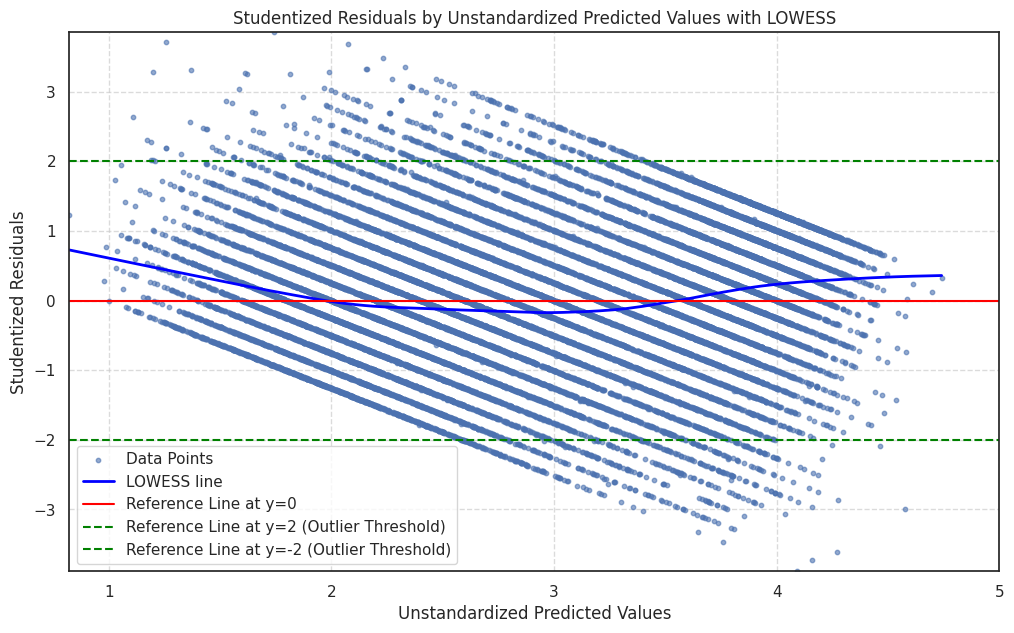

In [239]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

# Creating a copy of df
df_review = df.copy()

X1_list = [x for x in df_review.columns if x != 'financial_wellbeing_composite' and x != 'State-level-weight (Age, Eth, Edu)']
X = df_review[X1_list]
y = df_review['financial_wellbeing_composite']
X = sm.add_constant(X)  # Adds a constant term to the predictors
model = sm.OLS(y, X).fit()
df_review['predicted_score'] = model.predict(X)

# Generate the studendized residuals
df_review['studentized_residuals'] = model.get_influence().resid_studentized_internal

# Calculate LOWESS smoothed values
# The lowess function expects sorted x-values
sorted_indices = np.argsort(df_review['predicted_score'])
x_sorted = df_review['predicted_score'].iloc[sorted_indices]
y_sorted = df_review['studentized_residuals'].iloc[sorted_indices]
lowess_results = lowess(y_sorted, x_sorted, frac=0.3)

# Create scatter plot of Studendized residuals by Unstandardized Predicted Values
plt.figure(figsize=(12, 7)) # Set a reasonable figure size
plt.scatter(df_review['predicted_score'], df_review['studentized_residuals'], label='Data Points', alpha=0.6, s=10)

# Add the LOWESS line
plt.plot(lowess_results[:, 0], lowess_results[:, 1], color='blue', linestyle='-', linewidth=2, label='LOWESS line')

# Set x-axis limits to be slightly wider than the data range for better visualization
x_min = df_review['predicted_score'].min()
x_max = df_review['predicted_score'].max()
plt.xlim(x_min, x_max)
plt.xticks(np.arange(round(x_min), round(x_max) + 1, 1)) # Generate integer ticks on x-axis

# Set y-axis limits
y_min = df_review['studentized_residuals'].min()
y_max = df_review['studentized_residuals'].max()
plt.ylim(y_min, y_max)

plt.xlabel('Unstandardized Predicted Values')
plt.ylabel('Studentized Residuals')
plt.title('Studentized Residuals by Unstandardized Predicted Values with LOWESS')

# Add reference lines y=0, y=2, y=-2
plt.axhline(y=0, color='red', linestyle='-', label='Reference Line at y=0')
plt.axhline(y=2, color='green', linestyle='--', label='Reference Line at y=2 (Outlier Threshold)')
plt.axhline(y=-2, color='green', linestyle='--', label='Reference Line at y=-2 (Outlier Threshold)')

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

When using linear regression as an inferential model we should be concerned about any biased interpretation. When we perform linear regression we are attempting to the best linear combination of various features to estimate the dependent variable. The coefficients are estimates of the true population parameters of the phenomenon we are trying to understand. Estimates of the true population parameters are reliable only when the assumptions of linear regression are met.

The most important assumption in multiple regression is the dependent variable being a linear function of the independent variables. If this is violated, then all the estimates we get from regression - $R^2$, standard errors, tests of significance- may be biased (Keith, 2015). Biased regression coefficients means they are not likely to reproduce the true population parameters values. Another important assumption of multiple regression is that the residuals should be constant around the regression line. Violation of this assumption does not produce biased coefficient estimates, but does bias the standard errors and thus the significance of the regression coefficients (Keith, 2015).

Plotting the studentized residuals reveal that there is likely not a violation of the linearity assumption, but possibly a violation of constant errors. A regression diagnostic for non-linearity is plotting the studentized residuals versus the unstandardized predicted values. A non-parametric best fitting line is then fitted to the data points. If there is no departure from linearity, we would expect the lowess line to come close to the horizontal line (red line in this case) across all values. The lowess like should look like a young child freehand drawing a straight line (Keith, 2015). Indeed, the lowess line does appear to be fairly linear suggesting no material departure from linearity. However, we can see that there is a systematic over prediction at lower predicted well-being values and under prediction of higher well-being values. This can affect the standard errors and the statistically significant results of our analysis. This is something we must consider reporting when finalizing interpretations.


# Casual Modeling

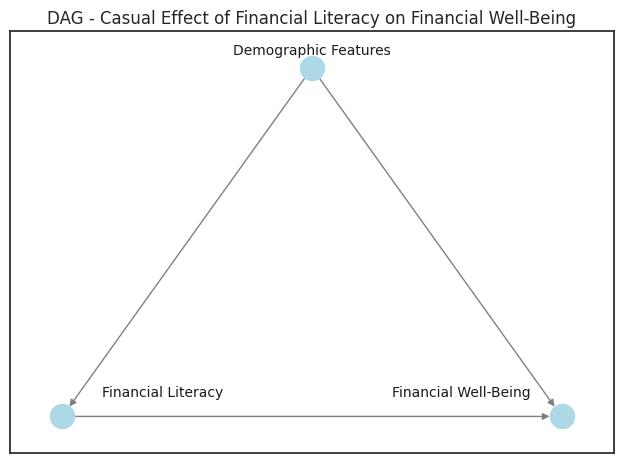

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
# Define directed acyclic graphs (DAG)
G = nx.DiGraph(
    [
        ("Financial Literacy", "Financial Well-Being"),
        ("Demographic Features", "Financial Literacy"),
        ("Demographic Features", "Financial Well-Being")
    ]
)
# Manually assign positions for triangle layout
pos = {
    "Demographic Features": (0, 1),   # top
    "Financial Literacy": (-1, 0),    # bottom left
    "Financial Well-Being": (1, 0)    # bottom right
}
# Draw the graph
fig, ax = plt.subplots()
nx.draw_networkx(G, pos=pos, ax=ax,
                 with_labels=False,
                 node_color="lightblue",
                 edge_color="gray",
                 arrows=True)

# Custom label positions (shift each one individually)
label_pos = {
    "Demographic Features": (0, 1.05),
    "Financial Literacy": (-0.6, 0.07),
    "Financial Well-Being": (0.6, 0.07)
}
nx.draw_networkx_labels(G, label_pos, font_size=10)
ax.set_title("DAG - Casual Effect of Financial Literacy on Financial Well-Being")
fig.tight_layout()
plt.show()

In this study we will be focusing on the casual effect of financial literacy on financial well-being. In casual modeling researchers must be explicit about their theory of what causal relations generate the data observed. To accomplish this, we will utilize a directed acyclic graph where each node represents either a cofounder, an action/ treatment, and an outcome. In the bottom left corner of the DAG we have the node financial literacy representing the treatment. The line from financial literacy and financial well-being represent that changes in financial literacy causes changes in financial well-being. Demographic features is placed above both financial literacy and financial well-being. It is meant to represent the variables that confound the relationship we are evaluating. Confounders affect both the treatment and the outcome of interests, which is why there is a directed line from “Demographic Features” to “Financial Literacy” and “Financial Well-Being.

In [ ]:
!pip install econml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 59.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.4/259.4 kB 20.3 MB/s eta 0:00:00
  Attempting uninstall: shap
    Found existing installation: shap 0.50.0
    Uninstalling shap-0.50.0:
      Successfully uninstalled shap-0.50.0


In [ ]:
# Main imports
from econml.dml import DML, LinearDML
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression

In [ ]:
# Defining features
Y= df['financial_wellbeing_composite']
T = df['literate']
# Covariates
exclude = [
 'FW_Never_have_the_things_I_want',
 'State-level-weight (Age, Eth, Edu)',
 'FW_I_am_just_getting_by',
 'FW_Money_I_have_or_will_save_wont_last',
 'FW_Money_left_over',
 'FW_finances_control_my_life',
 'FinLit_interest',
 'FinLit_inflation',
 'FinLit_return',
  'financial_wellbeing_composite',
  'literate'
 ]

cov = [x for x in list(df.columns) if x not in exclude]
W = df[cov]
weights = df['State-level-weight (Age, Eth, Edu)']

In [ ]:
# Performal casual inferance modeling
est = LinearDML(model_y=RandomForestRegressor(), # Outcome regressor
                model_t=RandomForestClassifier(min_samples_leaf=10), # Treatment classifier
                discrete_treatment=True,
                cv=6)
estimator = est.fit(Y, T, W=W, sample_weight= weights) # Fitting model to training data


In [ ]:
# Calculate treatment effects and confidence intervals
te_pred = est.effect()
lb, ub = est.effect_interval(alpha=0.01)

# Calculate the Average Treatment Effect (ATE)
print(f"Average Treatment Effect (ATE): {te_pred[0]:.3f}")
print(f"95% Confidence Interval for ATE: [{lb[0]:.3f}, {ub[0]:.3f}]")

Average Treatment Effect (ATE): -0.001
95% Confidence Interval for ATE: [-0.035, 0.034]


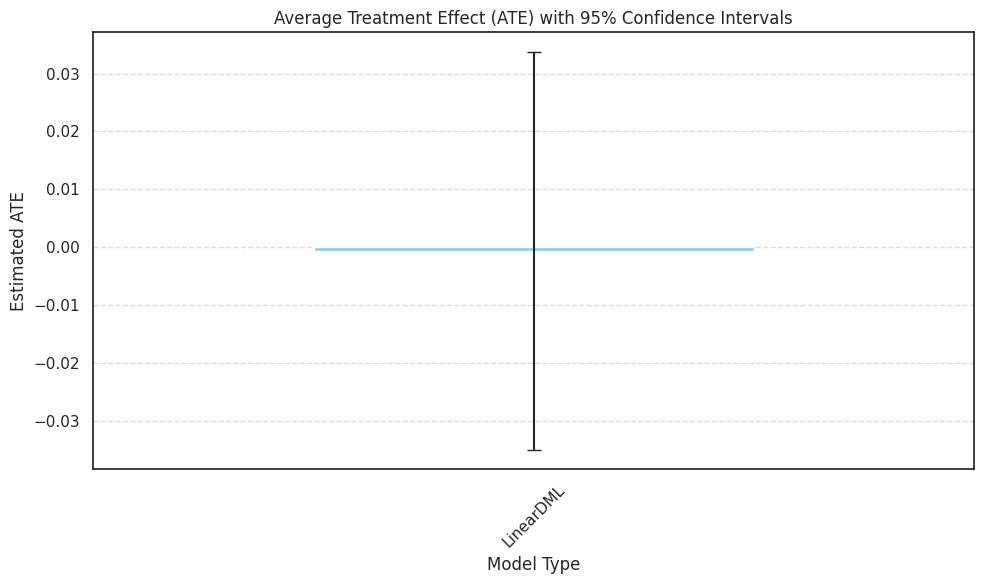

In [ ]:
# Extract ATE and confidence intervals for each model
results = {
    'LinearDML': {'ATE': te_pred[0], 'Lower Bound': lb[0], 'Upper Bound': ub[0]},
}

results_df = pd.DataFrame.from_dict(results, orient='index')
results_df['Error'] = results_df['Upper Bound'] - results_df['ATE']

# Plotting the ATE with confidence intervals
fig, ax = plt.subplots(figsize=(10, 6))

results_df['ATE'].plot(kind='bar', yerr=results_df['Error'], ax=ax, capsize=5, color='skyblue')

ax.set_title('Average Treatment Effect (ATE) with 95% Confidence Intervals')
ax.set_ylabel('Estimated ATE')
ax.set_xlabel('Model Type')
ax.tick_params(axis='x', rotation=45)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Casual inference makes use of the Frisch-Waugh-Lovell (FWL) theorem for debiasing. The framework essentially makes observational data appear as if it were generated from a randomized control trial. The theorem states that multiple regression can be performed in a single stage or three separate stages (Subramanian, 2024). The first step is identifying the treatment, confounders, and the outcome of interest. Next, the debiasing step regresses the treatment on the confounders to obtain the residuals of the treatment. The next step is a denoising stage in which the outcome is regressed on the confounders to obtain the residuals. Finally, the outcome model regresses the outcome residuals on the treatment residuals to obtain the average treatment effect. Casual inference makes use of this theorem by applying sophisticated machine learning algorithms that can model non-linear relationships and have less strict assumptions. Double machine learning in causal inference refers to using a machine learning algorithm for debiasing and denoising. Applying double machine learning to our data reveals that financial literacy does not have a statistically significant ATE on financial well-being.

After accounting for all covariates, there is virtually no causal impact caused by financial literacy on financial well-being. The average treatment effect is -0.001 with a 95% confidence interval of [-0.035, 0.034]. Since the confidence interval includes 0, the estimated average treatment effect is not statistically different from zero. Thus, we fail to reject the null hypothesis that the ATE is different from zero. This finding suggests that the causal effect of outcomes on financial well-being is more complex. Given the statistically significant results found in our OLS regression and its relation with saving and consumption theory, we can say that financial literacy likely still plays a pivotal role in financial well-being, although other factors may have to be considered. For instance, research by Muhammad Sajid and others found a strong positive impact of financial literacy and financial confidence on financial well-being with the intervening effect of financial behaviors ( M. Sajid et al., Financial literacy, confidence and well-being: The mediating role of financial behavior, 2024). This suggests that financial well-being is not just a factor of absolute financial knowledge, but rather a combination of the confidence to act upon this knowledge, shaping an individual's financial behaviors to seek the optimal balance of consumption, saving, and investing for their current financial situation.





Sensitivity analysis

In [ ]:
# Defining features
Y= df['financial_wellbeing_composite']
T = df['literate']
# Covariates
exclude = [
 'FW_Never_have_the_things_I_want',
 'State-level-weight (Age, Eth, Edu)',
 'FW_I_am_just_getting_by',
 'FW_Money_I_have_or_will_save_wont_last',
 'FW_Money_left_over',
 'FW_finances_control_my_life',
 'FinLit_interest',
 'FinLit_inflation',
 'FinLit_return',
  'financial_wellbeing_composite',
  'literate',
 'Emergency_funds_3_month_Yes',
 "Emergency_funds_3_month_Don't know",
 'Emergency_funds_3_month_Prefer not to say'
 ]

cov = [x for x in list(df.columns) if x not in exclude]
W = df[cov]
weights = df['State-level-weight (Age, Eth, Edu)']

In [ ]:
# Performal casual inferance modeling
est = LinearDML(model_y=RandomForestRegressor(), # Outcome regressor
                model_t=RandomForestClassifier(min_samples_leaf=10), # Treatment classifier
                discrete_treatment=True,
                cv=6)
estimator = est.fit(Y, T, W=W, sample_weight= weights) # Fitting model to training data

In [ ]:
# Calculate treatment effects and confidence intervals
te_pred = est.effect()
lb, ub = est.effect_interval(alpha=0.01)

# Calculate the Average Treatment Effect (ATE)
print(f"Average Treatment Effect (ATE): {te_pred[0]:.3f}")
print(f"95% Confidence Interval for ATE: [{lb[0]:.3f}, {ub[0]:.3f}]")

Average Treatment Effect (ATE): 0.029
95% Confidence Interval for ATE: [-0.007, 0.065]


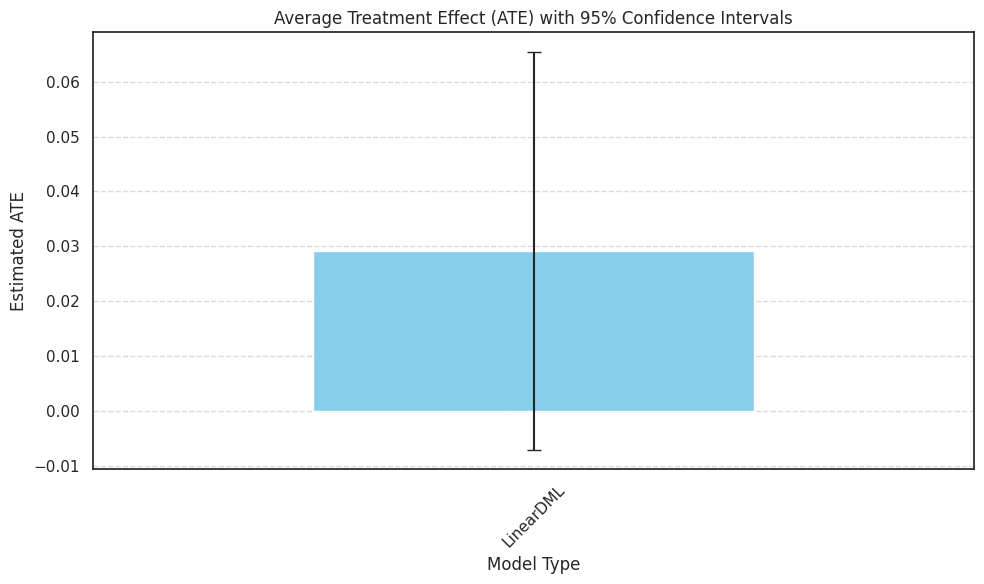

In [ ]:
# Extract ATE and confidence intervals for each model
results = {
    'LinearDML': {'ATE': te_pred[0], 'Lower Bound': lb[0], 'Upper Bound': ub[0]},
}

results_df = pd.DataFrame.from_dict(results, orient='index')
results_df['Error'] = results_df['Upper Bound'] - results_df['ATE']

# Plotting the ATE with confidence intervals
fig, ax = plt.subplots(figsize=(10, 6))

results_df['ATE'].plot(kind='bar', yerr=results_df['Error'], ax=ax, capsize=5, color='skyblue')

ax.set_title('Average Treatment Effect (ATE) with 95% Confidence Intervals')
ax.set_ylabel('Estimated ATE')
ax.set_xlabel('Model Type')
ax.tick_params(axis='x', rotation=45)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Omitting one of the highest contributors to financial well-being discovered in the OLS model, it is found that it drastically changes the average treatment effect. By removing “Emergency_funds_3_month_xxx” features, we discover a favorable increase in the ATE. The ATE has switched signs and now reports a value of 0.29, matching the regression coefficient from our OLS model. This shows the impact of what omitted variable bias can cause, and why it I crucial when working with causal models to include all theorized confounders that affect both the treatment and the outcome of interest